# **Proyecto Final -  Cambio climático y consumo de agua en Bogotá**
---

```En medio de los desafíos cada vez más evidentes del cambio climático, la gestión adecuada del agua se ha convertido en una prioridad fundamental para las autoridades locales en todo el mundo. En el caso específico de Bogotá, la capital de Colombia, este tema adquiere una importancia aún mayor debido a la creciente incidencia de fenómenos climáticos extremos y sus impactos en el suministro de agua y la calidad de vida de sus habitantes. Bogotá vive dos temporadas del año cada vez más extremas producidas por los fenomenos del niño (sequías) y de la niña (lluvias), esto sumado a la contaminación del ambiente y su dependencia total del sistema de paramos que hidratan a la ciudad con agua.```

### Equipo de trabajo

- Marcela Vásquez
- Omar Avendaño
- Duván Robayo


## **1.  Sobre el proyecto | Business Understanding**
---
El objetivo de esta sección es comprender los objetivos y requisitos del proyecto, explorando y definiendo el contexto en el que se realiza el análisis de los datos.

### **1.1.  Objetivo del proyecto**

> ##### Crear un modelo de aprendizaje que permita a las autoridades predecir el consumo de agua en la capital del país, teniendo en cuenta si existe o no relación con algunos indicadores de cambio climático, para ayudar a las autoridades locales a tomar decisiones informadas sobre la gestión y planificación del manejo del agua.

### **1.2.  Situación Actual**

> ##### En los últimos meses la ciudad de Bogotá ha vivido con mayor fuerza las consecuencias del cambio climático, en el primer mes del año 2024 se reportaron más de 130 incendios forestales en la ciudad, principalmente en los cerros orientales, lo que dejó cientos de hectareas destruídas por las conflagraciones y una crisis de calidad del aire en la ciudad.
>
> ##### Posteriormente, en el mes de Abril la ciudad vió las consecuencias de un intenso fenómeno del niño en los bajos niveles de agua de los embalses que proveen a la ciudad, llegando a niveles críticos por debajo del 15% de la capacidad total del sistema. Como consecuencia de esto la ciudad implementó medidas como el racionamiento de agua por sectores con el fin de reducir el consumo diario de agua. Hasta la fecha esta medida sigue en pie, hasta aumentar los niveles de agua en los embalses.

### **1.3.  Requisitos y limitaciones del proyecto**

> ##### Es importante aumentar la disponibilidad de datos en relación a los consumos de agua y niveles de los embalses, esta última información no encontrada en la plataforma de datos abiertos de la ciudad.
>
> ##### Este proyecto se realiza en un periodo corto de tiempo no mayor a una semana, por lo que existen posibilidades de mejora en los modelos de predicción, así como puede haber una mejora en la cantidad de datos de entrada para mejorar la precisión del mismo.

### **1.4.  Criterios de éxito**

> ##### - Precisión de las predicciones en la fase de testeo.
> ##### - Precisión de las predicciones en el año 2024 con respecto a lo que ha vivido la ciudad hasta el momento.
> ##### - Identificación de patrones o tendencias relacionadas con el cambio climático.

### **1.5.  Interesados (stakeholders)**

> ##### - Gubernamentales: Alcaldía de Bogotá, Secretaría de Ambiente y Acueducto de Bogotá.
> ##### - Habitantes de Bogotá.
> ##### - Comunidad académica.

## **2.  Reconocimiento de los datos | Data Understanding**
---
En esta sección se recopilan los datos relevantes para el proyecto, relalizando una exploración de los datos disponibles, la estructura, la calidad, distribución y relación de las variables. Se realiza un análisis descriptivo para obtener una comprensión de los datos.

### **2.1.  Importación de librerías**

En la siguiente celda se importan las librerías necesarias para el análisis de datos y la construcción de modelos de aprendizaje automático: **pandas, numpy, matplotlib, seaborn, sci-kit learn, prince y imblearn**.

In [207]:
import sys
!{sys.executable} -m pip install prince

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from prince import MCA
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
import numpy as np

### **2.2.  Extracción de los datos**

En la siguiente celda se extraen los datos provenientes de la plataforma de datos abiertos de la ciudad de Bogotá. A continuación se realiza una lista de los datasets cargados en este repositorio y sus enlaces.

| Nombre del dataset y enlace a la fuente de datos original                                                                     |  Definición                                    | Periodo de tiempo         |
|:-----------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------:|:-------------------------:|
| [climas.csv](https://datosabiertos.bogota.gov.co/dataset/cambio-climatico/resource/fcd408ad-d7eb-4b09-a1fe-a3f27b4af330)      | Comportamiento de fenomenos y variables climatólogicas.      | Mensual desde 2009 a 2023 |
| [consumo2017.csv](https://datosabiertos.bogota.gov.co/dataset/consumo-promedio/resource/25ccea9d-ebd0-441a-aca6-4802c6e292ec) | Consumo promedio de agua potable por suscriptor/hogar | Mensual desde 2017 a 2018 |
| [consumo2019.csv](https://datosabiertos.bogota.gov.co/dataset/dato-abierto-consumo-promedio-bogota-2020/resource/6fab3c8f-6b2a-47dd-8004-1005b2b26ccb) | Consumo promedio de agua potable por suscriptor/hogar | Mensual de 2019 |
| [consumo2020.csv](https://datosabiertos.bogota.gov.co/dataset/dato-abierto-consumprom-2021/resource/92cb3853-419a-4b0c-b285-c831bf83fa8b) | Consumo promedio de agua potable por suscriptor/hogar | Mensual de 2020 |
| [consumo2021.csv](https://datosabiertos.bogota.gov.co/dataset/dato-abierto-consumopromaps-alcaldiaf-2022-2/resource/484970b4-a7de-4587-9171-6a5779b6b284) | Consumo promedio de agua potable por suscriptor/hogar | Mensual de 2021           |
| [consumo2022.csv](https://datosabiertos.bogota.gov.co/dataset/dato-abierto-consumo-promedio-2023-2/resource/4d7e9002-959d-41d9-8150-ecc37be11d2b) | Consumo promedio de agua potable por suscriptor/hogar | Mensual de 2022           |
| [consumo2023.csv](https://datosabiertos.bogota.gov.co/dataset/dato-abierto-consumo-promedio-2023-12/resource/07dd6da2-ce5f-4d44-88e2-ffdf08206208) | Consumo promedio de agua potable por suscriptor/hogar | Mensual de 2023           |

In [208]:
# CARGAMOS DESDE EL DATASET LOCAL

climas = pd.read_csv("climas.csv", encoding='ISO-8859-1', delimiter=';')
consumos = pd.read_csv("consumos.csv")

### **2.3.  Revisión carga de datos**

Revisamos los datos cargados con solo las tres primeras filas usando .head()

In [209]:
climas.head(3)

,Año,Mes,Fecha,Dengue,ENOS C,ENOS,Añomes,No. Mes,Temperatura Máxima,Temperatura mínima,...,Lluvia Acumulada,Temporada *,Casos ESI-IRAG,FRM,Familias Afectadas,Inundaciones,Encharcamiento,Damnificados inundaciones,Damnificados encharcamientos,Clasificación ONI
0,2009,Ene,"jueves, 1 de enero de 2009",127,Niña,-0.8,2009Ene,1,23.5,4.0,...,476.9,Lluvioso,55,5,0,1,5,0,0,NIÑA DÉBIL
1,2009,Feb,"domingo, 1 de febrero de 2009",36,Niña,-0.7,2009Feb,2,23.8,5.1,...,796.7,Lluvioso,74,21,47,4,61,60,1,NIÑA DÉBIL
2,2009,Mar,"domingo, 1 de marzo de 2009",26,Niña,-0.5,2009Mar,3,23.7,7.3,...,1092.3,Lluvioso,149,7,5,4,35,7,2,NIÑA DÉBIL


In [210]:
consumos.head(3)

,Año,Mes,ConsumoBogota,ConsumoSoacha,ConsumoGachancipa
0,2017,1,10.92,7.53,9.60
1,2017,2,11.10,7.19,10.12
2,2017,3,10.91,7.51,10.11


**Notas:**

- Podemos observar que la información de consumo tiene datos sobre Bogotá, Soacha y Gachancipa, para cumplir con los objetivos de este análisis solo dejaremos los datos pertenecientes a Bogotá.

### **2.4.  Revisión de las dimensiones**

En esta sección haremos una revisión de la forma de los datos, para entender la cantidad de datos que tenemos disponibles y las columnas que tienen.

In [211]:
# Vamos a revisar el número de filas de los dataframes, para saber con qué cantidad de información contamos.

print(f"El número de filas del dataset climas es de: {climas.shape[0]}")
print(f"El número de filas del dataset consumos es de: {consumos.shape[0]}")

El número de filas del dataset climas es de: 174
El número de filas del dataset consumos es de: 84


**Notas:**

- Podemos observar que el dataset de climas tiene mayor número de registros ya que abarca un mayor periodo de tiempo.
- El dataset correspondiente al consumo de agua  tiene 84 registros, lo que indica que contienen información de 84 meses entre 2017 y 2023.

In [212]:
# Vamos a revisar el número de columnas de los dataframes, para saber con qué cantidad de variables contamos.

print(f"El número de columnas del dataset climas es de: {climas.shape[1]}")
print(f"El número de columnas del dataset consumos es de: {consumos.shape[1]}")


El número de columnas del dataset climas es de: 22
El número de columnas del dataset consumos es de: 5


**Notas:**

- Podemos observar que el dataset de climas tiene mayor riqueza de variables, ya que tiene 22 variables relacionadas con las mediciones.
- El dataset de consumos tiene 5 columnas, previamente evidenciamos que se refieren a la año y mes de la medición y a la medición en las 3 ciudades donde opera la empresa de Acueducto de Bogotá.

### **2.5.  Revisión tipos de variables**

En esta sección se identifican las columnas, se realiza una revisión de la cantidad de datos no nulos y el tipo de dato por cada columna.

In [213]:
# Este metodo permite mostrar información sobre las columnas y sus tipos de datos, así como un conteo de los valores no nulos.
climas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           174 non-null    int64  
 1   Mes                           174 non-null    object 
 2   Fecha                         174 non-null    object 
 3   Dengue                        174 non-null    int64  
 4   ENOS C                        174 non-null    object 
 5   ENOS                          174 non-null    object 
 6   Añomes                        174 non-null    object 
 7   No. Mes                       174 non-null    int64  
 8   Temperatura Máxima            174 non-null    float64
 9   Temperatura mínima            174 non-null    float64
 10  Temperatura promedio          174 non-null    float64
 11  Casos leptospirosis           174 non-null    int64  
 12  Lluvia Acumulada              174 non-null    float64
 13  Tempo

**Notas:**
- Se evidencian tres tipos de datos (Float, integer y Object).
- Se observa todas las variables están completas al no tener registros nulos, de los 174 registros, todas las variables cuentan con datos válidos.
- Preliminarmente se puede observar que existen 15 variables numéricas y 7 cualitativas.

In [214]:
# Este metodo permite mostrar información sobre las columnas y sus tipos de datos, así como un conteo de los valores no nulos.
consumos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                84 non-null     int64  
 1   Mes                84 non-null     int64  
 2   ConsumoBogota      84 non-null     float64
 3   ConsumoSoacha      84 non-null     float64
 4   ConsumoGachancipa  83 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.4 KB


**Notas:**
- Se evidencia 2 tipos de datos (Integer y Float).
- Se observa todas las variables están completas, con 84 registros válidos.

### **2.6.  Revisión estadística de las variables numéricas**

Se identifica por cada variable numérica el promedio, la desviación promedio de los datos, los valores mínimos y máximos, así como los percentiles.

In [215]:
# Usamos el metodo describe.

climas.describe()

,Año,Dengue,No. Mes,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Casos leptospirosis,Lluvia Acumulada,Casos ESI-IRAG,FRM,Familias Afectadas,Inundaciones,Encharcamiento,Damnificados inundaciones,Damnificados encharcamientos
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2015.758621,116.557471,87.500000,25.039655,5.387931,14.570690,3.988506,756.237356,197.557471,19.752874,47.045977,1.787356,23.086207,10.218391,147.557471
std,4.202849,149.386973,50.373604,1.654485,1.526007,0.496177,4.118180,493.544860,466.155764,35.828620,128.769266,5.287750,52.717137,85.343160,1620.815378
min,2009.000000,6.000000,1.000000,21.300000,0.400000,13.590000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,37.000000,44.250000,24.000000,4.300000,14.262500,1.000000,370.925000,59.250000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2016.000000,64.000000,87.500000,24.900000,5.400000,14.510000,3.000000,672.900000,100.000000,7.000000,6.500000,0.000000,7.000000,0.000000,0.000000
75%,2019.000000,133.000000,130.750000,26.200000,6.500000,14.850000,6.000000,1047.750000,188.000000,19.000000,28.500000,1.000000,26.750000,0.000000,5.750000
max,2023.000000,1101.000000,174.000000,29.700000,9.100000,16.190000,25.000000,2413.200000,5063.000000,236.000000,915.000000,55.000000,498.000000,1099.000000,21344.000000


**Notas:**
- Podemos observar que en promedio por mes han existido 116 casos de dengue, con un número mínimo de casos de 6 y uno máximo de 1101 casos.
- Se puede observar que en promedio la temperatura máxima registrada ha sido de 25°C, con el mayor registro de temperatura como 29.7°C.
- Se puede observar que en promedio la temperatura mínima registrada ha sido de 5.37°C, con el menor registro de temperatura como 0.4°C.
- Se puede observar que en promedio la temperatura promedio registrada ha sido de 14.57°C, y una desviación promedio de 0.49°C con respecto al promedio de temperatura. Adicionalmente se puede observar que el 75% de los registros de temperatura han estado por debajo de los 14.85°C.
- Existen en promedio 3 casos de leptospirosis por mes, con un registro máximo de casos de 25 y un mínimo de 0.
- COn respecto a la lluvia acumulada se puede observar que en promedio al mes se registran 756mm, lo que significa un promedio diario de 25cm de agua. Es decir que si se extendiera uniformemente sobre la superficie, alcanzaría una altura de 25cm. Adicionalmente han existido registros donde la lluvia acumulada ha superado los 2400 mm, lo que equivale a 80cm diarios. Y registros minimos de lluvia acumulada de 11mm, lo que equivale a 0.36 mm diarios de agua.
- Con respecto a los casos de infecciones respiratorias agudas se puede observar un promedio de 197 casos al mes y un mayor pico de 5063 casos.
- Con respecto al número de casos de remoción en masa, se registra un promedio de 19 casos al mes y un máximo de 236.

In [216]:
# Usamos el metodo describe.
consumos.describe()

,Año,Mes,ConsumoBogota,ConsumoSoacha,ConsumoGachancipa
count,84.000000,84.000000,84.000000,84.000000,83.000000
mean,2020.000000,6.500000,11.070476,7.781905,11.020361
std,2.012012,3.472786,0.312922,0.795438,2.029545
min,2017.000000,1.000000,10.540000,7.190000,9.230000
25%,2018.000000,3.750000,10.857500,7.590000,10.440000
50%,2020.000000,6.500000,11.070000,7.630000,11.000000
75%,2022.000000,9.250000,11.330000,7.720000,11.300000
max,2023.000000,12.000000,12.430000,12.640000,28.570000


**Notas:**
- Podemos observar que en promedio el consumo de agua por hogar en Bogotá es de 11 m3 con un maximo registro de consumo de 12.43m3 y un mínimo de 10.54 m3.
- Podemos observar que en Soacha el promedio de Consumo baja significativamente por hogar con un promedio de 7.78 m3 y un máximo registro de 12.64 m3.
- Con respecto a Gachancipa se puede observa un promedio de consumo similar al de Bogotá por hogar.

### **2.7.  Diccionario de datos**

Se describen cada una de las columnas presentes en los dataframes que se almacenarán para realizar los análisis y las predicciones correspondientes, proponiendo un nuevo nombre, la definición de estas variables, los tipos de datos y tipos de variable.

El conjunto de datos cuenta con las siguientes variables:

| Variable                  | Nuevo Nombre    | Definición	                                 | Tipo de Dato en Python | Tipo de Variable    |
|:-------------------------:|:---------------:|:---------------------------------------------|:----------------------:|:-------------------:|
| Año                       | Año             | Año del registro                             | String                 | Categórica(ordinal) |
| Mes                       | Mes             | Mes del registro                             | String                 | Categórica(ordinal) |
| ENOS C                    | Fenomeno        | Tipo de fenómeno climatológico               | String                 | Categórica(nominal) |
| Clasificación ONI         | ClasFenomeno    | Clasificación del fenómeno                   | String                 | Categórica(nominal) |
| ENOS                      | IndiceFenomeno  | Índice oceánico del fenómeno                 | Float                  | Numérica(continua)  |
| Temporada *               | Temporada       | Temporada del año                            | String                 | Categórica(nominal) |
| Temperatura mínima        | TempMin         | Temperatura mínima registrada                | Float                  | Numérica(continua)  |
| Temperatura promedio      | TempProm        | Temperatura promedio registrada              | Float                  | Numérica(continua)  |
| Temperatura Máxima        | TempMax         | Temperatura máxima registrada                | Float                  | Numérica(continua)  |
| Lluvia Acumulada          | Precipitaciones | Cantidad de lluvia registrada en mm.         | Float                  | Numérica(continua)  |
| Inundaciones              | Inundaciones    | Cantidad de inundaciones.                    | Integer                | Numérica(discreta)  |
| FRM                       | FRMs            | Cantidad de Fenómenos de Remosión en Masa.   | Integer                | Numérica(discreta)  |
| Familias Afectadas        | FamAfectadas    | Número de Familias afectadas                 | Integer                | Numérica(discreta)  |
| Damnificados Inundaciones | Damnificados    | Número de damnificados.                      | Integer                | Numérica(discreta)  |
| Dengue                    | CasosDengue     | Número casos de dengue                       | Integer                | Numérica(discreta)  |
| Casos leptospirosis       | CasosLepto      | Número de casos de leptospirosis.            | Integer                | Numérica(discreta)  |
| Casos ESI-IRAG            | CasosIRAG       | Número de infecciones respiratorias agudas.  | Integer                | Numérica(discreta)  |
| ConsumoBogota             | ConsumoAgua     | Cantidad de m3 de agua consumidos por hogar. | Float                  | Numérica(continua)  |

## **3. Preparación y análisis de los datos | Data Preparation**
---
En esta sección haremos una transformación y preparación de los datos para el modelado, así como un análisis descriptivo de las variables mediante visualizaciones.

### **3.1.  Eliminación de columnas**

A continuación vamos a eliminar las columnas que hemos descartado para el análisis, tomando como referencia el diccionario de datos que previamente hemos creado.

In [217]:
# Creamos un nuevo dataframe solo con las columnas que necesitamos.
data = climas.drop(columns=["Fecha", "Añomes", "No. Mes", "Encharcamiento", "Damnificados encharcamientos"])

### **3.2.  Eliminación de filas**

A continuación vamos a eliminar las filas que contienen registros por debajo del año 2017, ya que solo tenemos registros de consumo de agua desde el 2017 hasta el 2023.

In [218]:
# Eliminamos las filas que en su año estén por debajo de 2017.
data = data[data["Año"] >= 2017]

### **3.3.  Renombrando columnas**

A continuación vamos a renombrar las columnas con el fin de mejorar el manejo de los datos.

In [219]:
data.rename(columns={
    "Dengue": "CasosDengue",
    "ENOS C": "Fenomeno",
    "ENOS": "IndiceFenomeno",
    "Temperatura Máxima": "TempMax",
    "Temperatura mínima": "TempMin",
    "Temperatura promedio": "TempProm",
    "Casos leptospirosis": "CasosLepto",
    "Lluvia Acumulada": "Precipitaciones",
    "Temporada *": "Temporada",
    "Casos ESI-IRAG": "CasosIRAG",
    "FRM": "FRMs",
    "Familias Afectadas": "FamAfectadas",
    "Damnificados inundaciones": "Damnificados",
    "Clasificación ONI": "ClasFenomeno",
      }, inplace=True)

### **3.4.  Reorganizando columnas**

A continuación vamos a reorganizar las columnas con el fin de mejorar el manejo de los datos, usando como referencia el diccionario de datos.

In [220]:
data = data[["Año", "Mes", "Fenomeno", "ClasFenomeno", "IndiceFenomeno", "Temporada", "TempMin", "TempProm", "TempMax", "Precipitaciones",
             "Inundaciones", "FRMs", "FamAfectadas", "Damnificados", "CasosDengue", "CasosLepto", "CasosIRAG"]]

### **3.5.  Transformación de columnas**

A continuación vamos a transformar las columnas para estandarizar los datos antes de los análisis.

#### Año

In [221]:
# Convertimos la columna año a strings.

data["Año"] = data["Año"].astype(str)

#### Mes

In [222]:
# Mapeamos los valores de los meses para convertirlos en números(strings)

mapMes = {
    "Ene": "1",
    "Feb": "2",
    "Mar": "3",
    "Abr": "4",
    "May": "5",
    "Jun": "6",
    "Jul": "7",
    "Ago": "8",
    "Sep": "9",
    "Oct": "10",
    "Nov": "11",
    "Dic": "12",
}

data["Mes"] = data["Mes"].map(mapMes)


#### ClasFenomeno

In [223]:
# Mapeamos los valores de las clasificaciones de los fenomenos para estandarizarlos.

mapClas = {
    "NEUTRO": "Neutro",
    "NIÑA DÉBIL": "Debil",
    "NIÑO DÉBIL": "Debil",
    "NIÑA MODERADO": "Moderado",
    "NIÑA FUERTE": "Fuerte",
    "NIÑO FUERTE": "Fuerte",
}

data["ClasFenomeno"] = data["ClasFenomeno"].map(mapClas)

#### IndiceFenomeno

In [224]:
# Reemplazamos las comas por puntos para normalizar el tipo de dato de la columna.
data["IndiceFenomeno"] = data["IndiceFenomeno"].str.replace(",", ".")
data["IndiceFenomeno"] = pd.to_numeric(data["IndiceFenomeno"])

#### Temporada

In [225]:
# Mapeamos los valores de las clasificaciones de los fenomenos para estandarizarlos.

mapTemp = {
    "Lluvioso": "Lluvias",
    "Menos lluvioso": "Seca",
}

data["Temporada"] = data["Temporada"].map(mapTemp)

### **3.6.  Unificando datasets**

A continuación vamos a unificar los dos dataframes, con el objetivo de consolidar toda la información en una sola tabla.

In [226]:
# Reseteamos los indices para hacer la unión de los datasets.
data = data.reset_index(drop=True)

# Unimos los datasets por medio de un left join, usando como referencia los indices.
data = data.merge(consumos, left_index=True, right_index=True, how="left")

# Eliminamos las columnas que no necesitamos del dataframe que agregamos.
data = data.drop(columns=["Año_y", "Mes_y", "ConsumoSoacha", "ConsumoGachancipa"])

# Renombramos las columnas
data.rename(columns={
    "Año_x": "Año",
    "Mes_x": "Mes",
    "ConsumoBogota": "ConsumoAgua",
      }, inplace=True)

### **3.7.  Distribución de los meses por fenómeno y clsificación del mismo**

A continuación vamos a realizar un análisis sobre la distribución de los meses con respecto a los fenómenos naturales, con el fin de identificar la presencia de estos fenómenos climáticos.

In [227]:
# Definimos los colores que usaremos en los gráficos
color1 = "#363432"
color2 = "#196774"
color3 = "#90A19D"
color4 = "#F0941F"
color5 = "#EF6024"
colores = [color1, color2, color3, color4, color5]

In [228]:
# Agrupamos los datos por Fenómeno y Clase del fenómeno y contamos la cantidad de ocurrencias
groupFenomenos = data.groupby(["Fenomeno", "ClasFenomeno"]).size().unstack(fill_value=0)

In [229]:
# Agrupamos los datos por Temporada y Clase del fenómeno y contamos la cantidad de ocurrencias
groupTemporadas = data.groupby(["Temporada", "ClasFenomeno"]).size().unstack(fill_value=0)

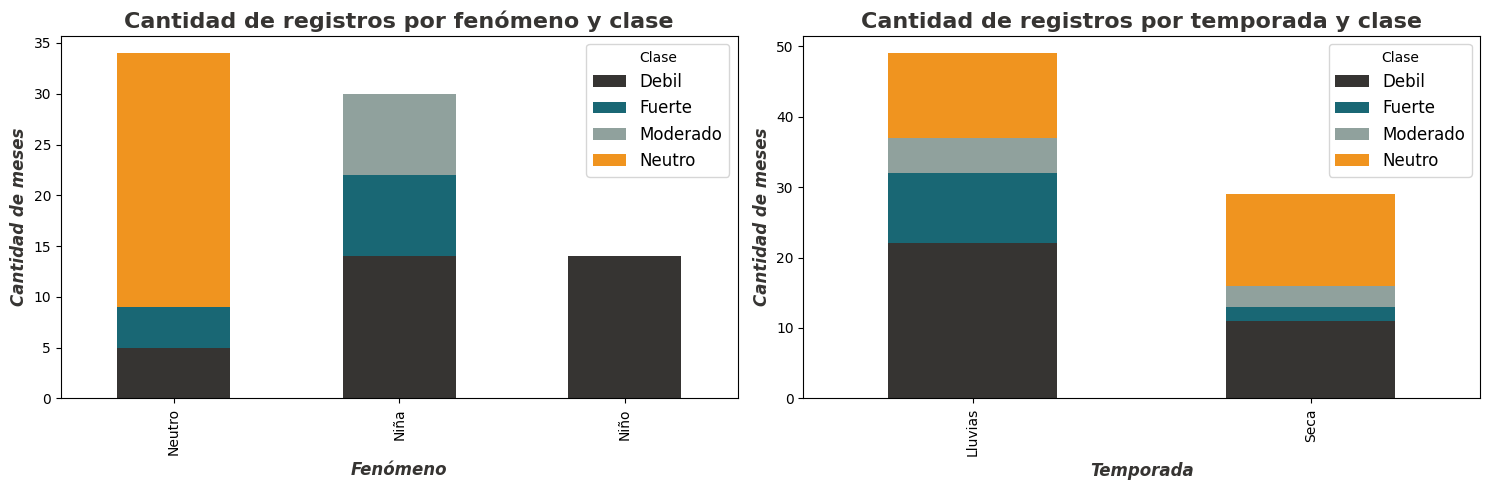

In [230]:
# Creamos el lienzo con una fila y dos columnas.
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1
groupFenomenos.plot(kind="bar", stacked=True, ax=axs[0], color=colores)
axs[0].set_xlabel("Fenómeno", fontsize=12, color= color1, fontstyle="italic", fontweight="bold")
axs[0].set_ylabel("Cantidad de meses", fontsize=12, color= color1, fontstyle="italic", fontweight="bold")
axs[0].set_title("Cantidad de registros por fenómeno y clase", fontsize=16, color= color1, fontweight="bold")
axs[0].legend(title="Clase", fontsize=12)

# Gráfico 2
groupTemporadas.plot(kind="bar", stacked=True, ax=axs[1], color=colores)
axs[1].set_xlabel("Temporada", fontsize=12, color= color1, fontstyle="italic", fontweight="bold")
axs[1].set_ylabel("Cantidad de meses", fontsize=12, color= color1, fontstyle="italic", fontweight="bold")
axs[1].set_title("Cantidad de registros por temporada y clase", fontsize=16, color= color1, fontweight="bold")
axs[1].legend(title="Clase", fontsize=12)

#Ajustes adicionales
plt.tight_layout()
plt.show()

**Notas:**
- Podemos observar que se presentan más meses con el fenómeno neutro, es decir, meses del año donde no se acentúa ninguno de los dos meses.
- Podemos evidenciar que la presencia del fenómeno de la niña es mayor que la presencia del fenómeno del niño si lo revisamos en la cantidad de meses. Adicionalmente el fenómeno de la niña presenta variaciones en cuanto a su clasificación, con mayor presencia de una "niña" debil.
- En cuanto al fenómeno del niño podemos observar una clasificación debil.
- Con respecto a las temporadas del año podemos observar que existe mayor presencia de la temporada de lluvias en la ciudad, con mayor incidencia en la clasificación "Debil".
- Con respecto a la temporada seca podemos observar que la mayoría de sus clasificaciones son debiles y neutras.

### **3.8.  Variaciones de la temperatura, las precipitaciones, las inundaciones y fenomenos de remosión en masa a lo largo del tiempo.**

A continuación vamos a realizar un análisis temporal que nos permita observar patrones a lo largo del tiempo en cuanto a la temperatura y otras variables climáticas.

In [231]:
# Con el fin de realizar este análisis creamos una columna Fecha que tenga el mes y año del registro.
data['Fecha'] = pd.to_datetime(data['Año'].astype(str) + '-' + data['Mes'].astype(str))

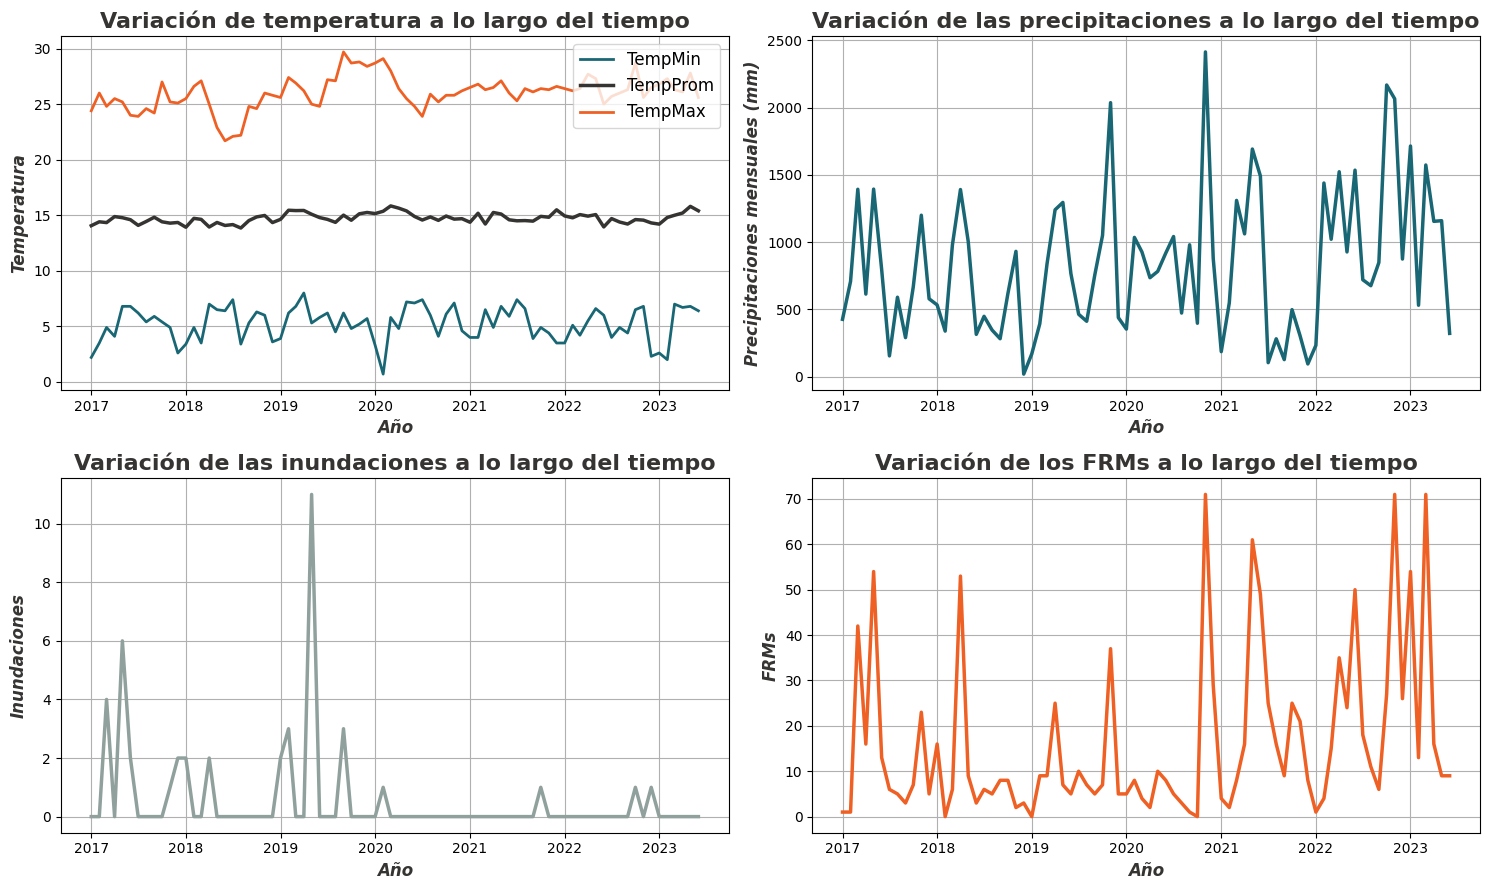

In [232]:
# Creamos el lienzo con dos filas y dos columnas
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Graficamos el gráfico de temperaturas
axs[0, 0].plot(data["Fecha"], data["TempMin"], label="TempMin", color=color2, linewidth=2)
axs[0, 0].plot(data["Fecha"], data["TempProm"], label="TempProm", color=color1, linewidth=2.5)
axs[0, 0].plot(data["Fecha"], data["TempMax"], label="TempMax", color=color5, linewidth=2)
axs[0, 0].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 0].set_ylabel("Temperatura", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 0].set_title("Variación de temperatura a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[0, 0].legend(fontsize=12)
axs[0, 0].grid(True)

# Graficamos el gráfico de precipitaciones
axs[0, 1].plot(data["Fecha"], data["Precipitaciones"], color=color2, linewidth=2.5)
axs[0, 1].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 1].set_ylabel("Precipitaciones mensuales (mm)", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 1].set_title("Variación de las precipitaciones a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[0, 1].grid(True)

# Graficamos el gráfico de inundaciones
axs[1, 0].plot(data["Fecha"], data["Inundaciones"], color=color3, linewidth=2.5)
axs[1, 0].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 0].set_ylabel("Inundaciones", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 0].set_title("Variación de las inundaciones a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[1, 0].grid(True)

# Graficamos el gráfico de Fenómenos de Remosión en Masa
axs[1, 1].plot(data["Fecha"], data["FRMs"], color=color5, linewidth=2.5)
axs[1, 1].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 1].set_ylabel("FRMs", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 1].set_title("Variación de los FRMs a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[1, 1].grid(True)

# Ajustes adicionales
plt.tight_layout()
plt.show()


**Notas:**
- Con respecto a la temperatura promedio mensual podemos observar que no hay mayor variabilidad manteniendose entre los 13.85°C y los 15.84°C.
- Con respecto a la temperatura máxima se observa una mayor variabilidad, con unos máximos importantes en los últimos meses del año 2019 y primeros meses de 2020.
- Con respecto a la temperatura mínima se observa también una mayor variabilidad, con unos mínimos importantes en el mes de febrero de 2020, con un pico de 0.7° C de temperatura.
- Con respecto a las precipitaciones a lo largo de estos 7 años se puede observar mayores precipitaciones en los meses de octubre de 2020 y 2021 y una reducción considerable de las precipitaciones a la mitad del año 2023. También se puede observar un incremento en la cantidad de precipitaciones a lo largo de los años, siendo el año 2022 un año con mayor número de precipitaciones en promedio.
- Con respecto a las inundaciones se observa un alto número de inundaciones en el mes de Abril de 2019 con más de 10 inundaciones en un solo mes, sin embargo en los últimos años el número de inundaciones ha bajado considerablemente lo que sugeriría una mayor preparación de la ciudad frente a grandes precipitaciones.
- Con respecto a los fenómenos de remosión en masa se puede considerar que en los últimos años estos accidentes han aumentado, especialmente en los últimos meses del año 2022.

### **3.9.  Variaciones en las víctimas de los fenómenos climáticos.**

A continuación vamos a realizar un análisis temporal que nos permita observar en número las víctimas asociadas a los fenómenos climáticos de la ciudad.

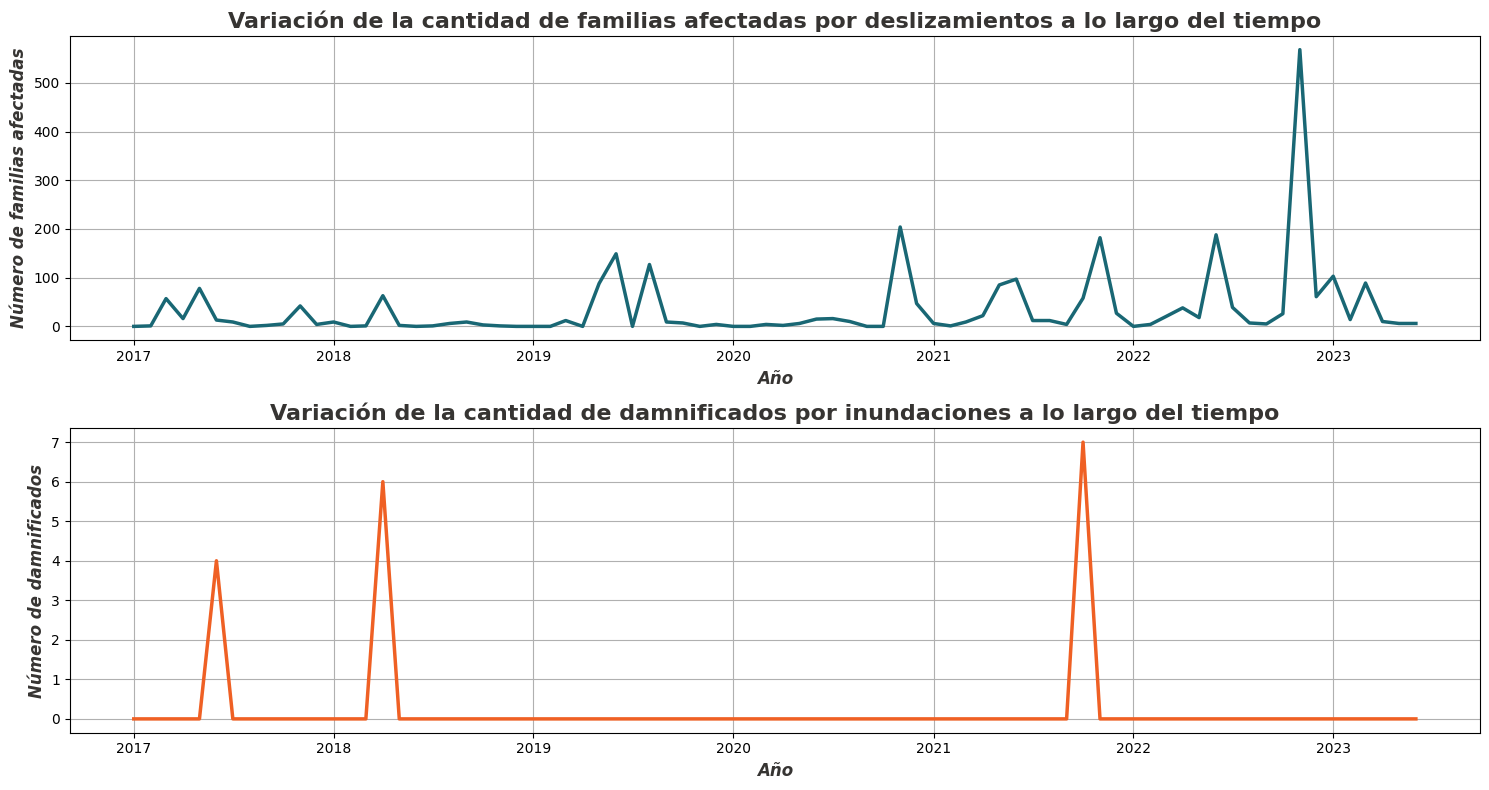

In [233]:
# Creamos el lienzo con dos filas y dos columnas
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

# Graficamos el gráfico de precipitaciones
axs[0].plot(data["Fecha"], data["FamAfectadas"], color=color2, linewidth=2.5)
axs[0].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0].set_ylabel("Número de familias afectadas", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0].set_title("Variación de la cantidad de familias afectadas por deslizamientos a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[0].grid(True)

# Graficamos el gráfico de inundaciones
axs[1].plot(data["Fecha"], data["Damnificados"], color=color5, linewidth=2.5)
axs[1].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1].set_ylabel("Número de damnificados", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1].set_title("Variación de la cantidad de damnificados por inundaciones a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[1].grid(True)


# Ajustes adicionales
plt.tight_layout()
plt.show()


**Notas:**
- Con respecto a las familias afectadas por deslizamientos o remosiones en masa, se observa un gran aumento de afectados en el año 2022, especificamente en el mes de octubre con más de 500 familias afectadas lo que tendría relación con los más 70 fenómenos de deslizamientos ocurridos en esta época por las precipitaciones de este mes.
- Con respecto a los damnificados por inundaciones se puede observar un pico en el mes de octrubre de 2021. Sin embargo, el número de damnificados es menor con respecto al evento de afectados por deslizamientos.

### **3.10.  Variaciones en la salud pública y el consumo de agua**

A continuación vamos a realizar un análisis temporal que nos permita observar en número de casos de enfermedades relacionadas con el cambio climático y las temperaturas de la ciudad. Las principales enfermedades son:

- Infecciones Respiratorias Agudas (IRAG)
- Leptospirosis (Relacionada con el consumo o contacto con agua contaminada)
- Dengue (Relacionada con mosquitos por reservorios de agua o acumulaciones de agua)

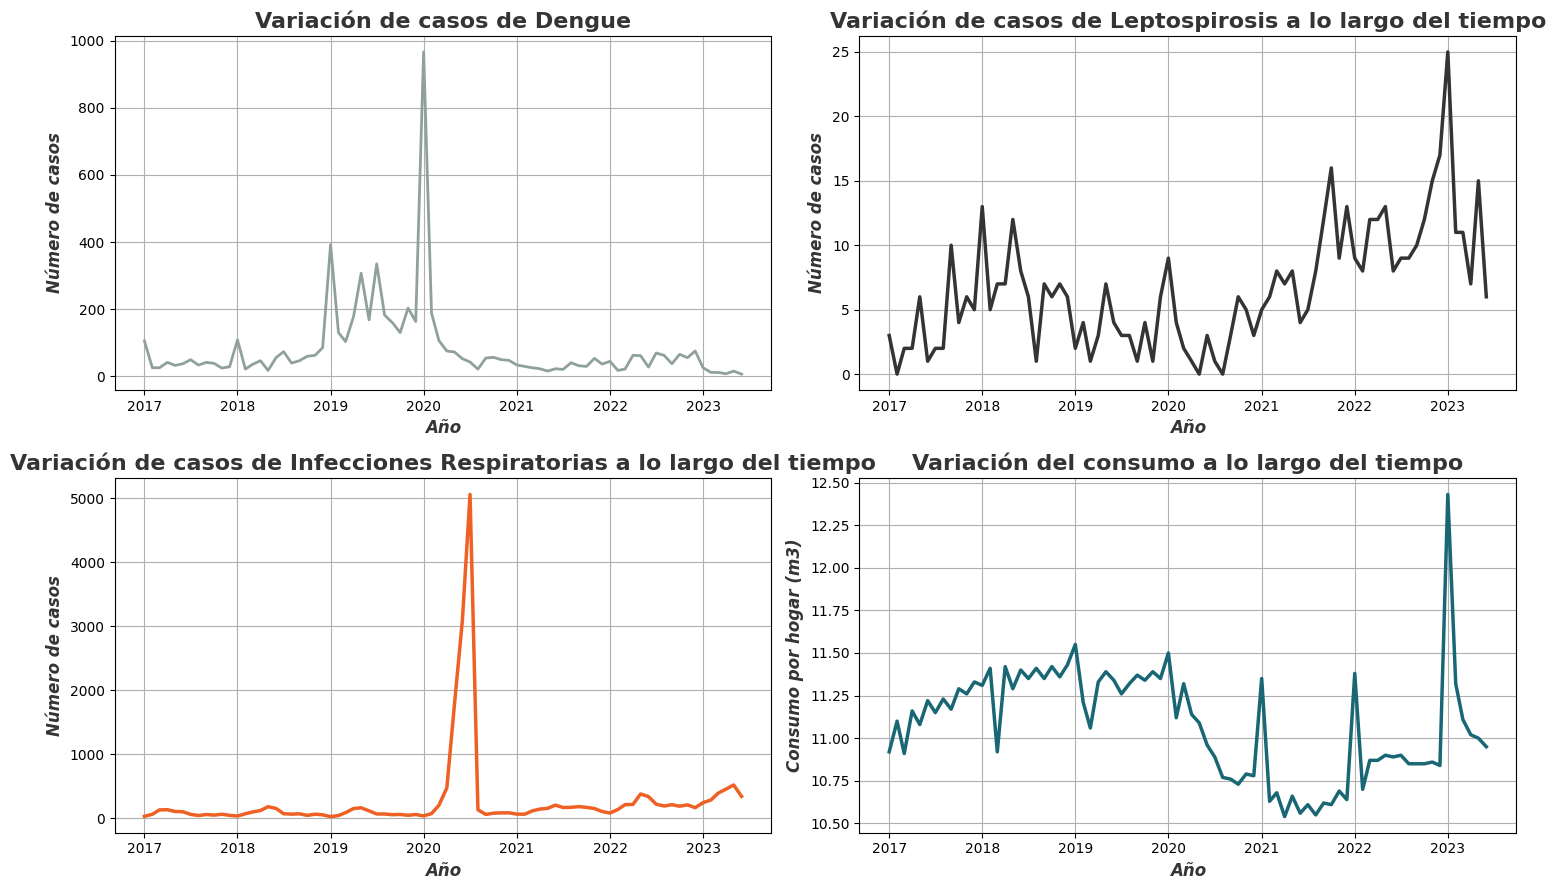

In [234]:
# Creamos el lienzo con dos filas y dos columnas
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Graficamos el gráfico de temperaturas
axs[0, 0].plot(data["Fecha"], data["CasosDengue"], color=color3, linewidth=2)
axs[0, 0].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 0].set_ylabel("Número de casos", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 0].set_title("Variación de casos de Dengue", fontsize=16, color=color1, fontweight="bold")
axs[0, 0].grid(True)

# Graficamos el gráfico de precipitaciones
axs[0, 1].plot(data["Fecha"], data["CasosLepto"], color=color1, linewidth=2.5)
axs[0, 1].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 1].set_ylabel("Número de casos", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[0, 1].set_title("Variación de casos de Leptospirosis a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[0, 1].grid(True)

# Graficamos el gráfico de inundaciones
axs[1, 0].plot(data["Fecha"], data["CasosIRAG"], color=color5, linewidth=2.5)
axs[1, 0].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 0].set_ylabel("Número de casos", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 0].set_title("Variación de casos de Infecciones Respiratorias a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[1, 0].grid(True)

# Graficamos el gráfico de Fenómenos de Remosión en Masa
axs[1, 1].plot(data["Fecha"], data["ConsumoAgua"], color=color2, linewidth=2.5)
axs[1, 1].set_xlabel("Año", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 1].set_ylabel("Consumo por hogar (m3)", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
axs[1, 1].set_title("Variación del consumo a lo largo del tiempo", fontsize=16, color=color1, fontweight="bold")
axs[1, 1].grid(True)

# Ajustes adicionales
plt.tight_layout()
plt.show()

**Notas:**
- Con respecto a los casos de Dengue se observa un pico de esta enfermedad en el año 2019, llegando a casi 1000 casos en el me de diciembre de de ese mismo año, lo que coincide con un mayor número de inundaciones para esa época. Para el año 2023 se observa un descenso muy importante en el número de casos.
- Con respecto a los casos de leptospirosis, se observan fuertes picos de esta enfermedad en los meses de Diciembre, pero con un mayor número de casos en el mes de Diciembre de 2022. Lo que puede coincidir con un aumento en el consumo de agua para esta época.
- Con respecto a los casos de infecciones respiratorias agudas podemos observar un pico muy alto en el año 2020 para el mes de Mayo y Junio, que puede estar altamente influenciado con la pandemia de COVID-19 de esa época. También se observa un aumento siginficativo en los años 2022 y 2023 en el número de casos, con una alta presencia de infecciones en el primer semestre de cada año.
- Con respecto al consumo de agua en la ciudad, se puede observar mayor tendencia de consumo en los meses de Diciembre, especialmente en el mes de Diciembre de 2022 llegando a sobrepasar los 12 m3 de consumo de agua por hogar.

### **3.11.  Distribución de frecuencias datos categóricos**

A continuación vamos a realizar un lienzo con las frecuencias de los datos categóricos, esto con el fin de identificar tendencias en los datos.


In [235]:
# Primero separamos las variables del dataset de acuerdo a su tipo de variable.
dataCat = data[["Año", "Mes", "Fenomeno", "ClasFenomeno", "Temporada"]]
dataNum = data[["IndiceFenomeno", "TempMin", "TempProm", "TempMax", "Precipitaciones", "Inundaciones", "FRMs",
            "FamAfectadas", "Damnificados", "CasosDengue", "CasosLepto", "CasosIRAG", "ConsumoAgua"]]

In [236]:
dataNum.columns

Index(['IndiceFenomeno', 'TempMin', 'TempProm', 'TempMax', 'Precipitaciones',
       'Inundaciones', 'FRMs', 'FamAfectadas', 'Damnificados', 'CasosDengue',
       'CasosLepto', 'CasosIRAG', 'ConsumoAgua'],
      dtype='object')

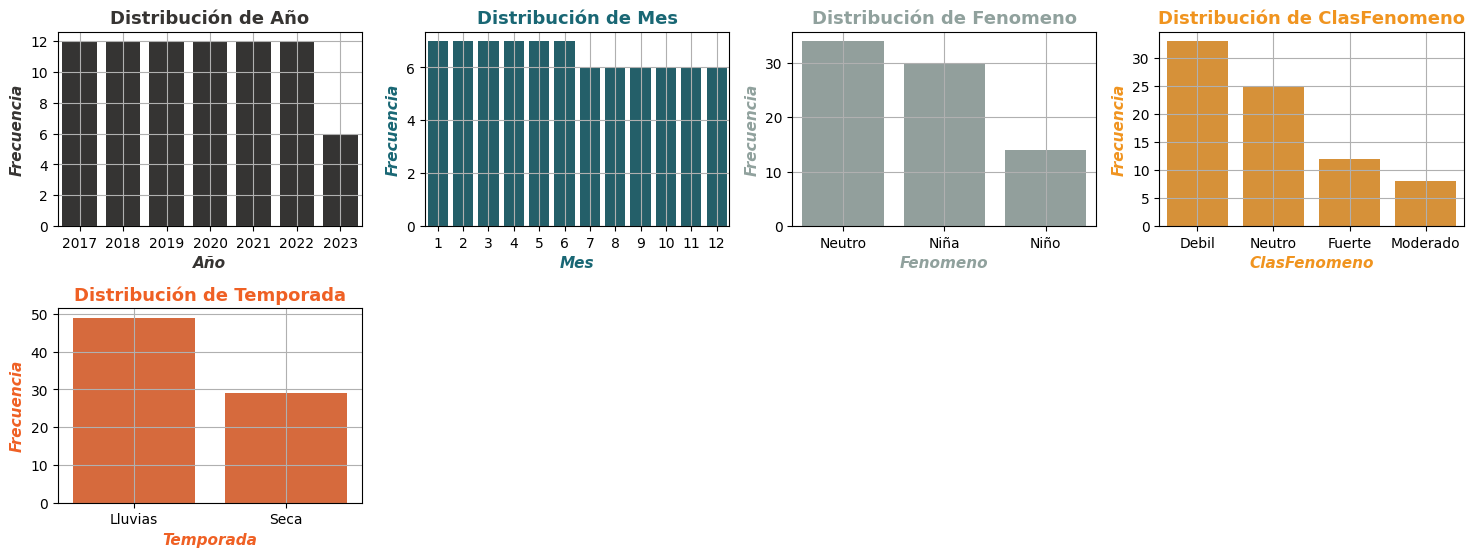

In [237]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(dataCat.columns):
    if c > 4:
        c = 0
    plt.subplot(3, 4, i + 1)
    sns.barplot(x=dataCat[column].value_counts().index, y=dataCat[column].value_counts().values, color=colores[c])
    plt.title(f"Distribución de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Frecuencia", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**
- Con respecto a las frecuencias de los años podemos observar una distribución equitativa de frecuencias a excepción del año 2023 en donde solo tenemos datos de los primeros 6 meses de este año, ya que no se han actualizado los datos del segundo semestre de 2023.
- Con respecto a las frecuencias de los meses observamos un comportamiento similar, donde los 6 primeros meses del año tienen mayor frecuencia de datos, que los meses del segundo semestre, esto por lo mismo de que no tenemos información actualizada del último año.
- Con respecto a la distribución de los fenómenos naturales podemos observar una mayor representación del fenómeno Neutro, es decir, sin presencia de Niño o Niña, con aproximadamente 35 meses. Posteriormente sigue la niña con un total de 30 meses. Y una menor representación del fenómeno del niño con aproximadamente 14 meses.
- Con respecto a la clasificación de los fenómenos observamos mayor representación de una clasificación débil con una frecuencia mayor a 30 meses. Una participación de Neutro como clasificación con aproximadamente 25 meses, y una baja representación de clasificaciones como fenómeno fuerte y moderado.
- Con respecto a la temporada, podemos observar mayor frencuencia de temporadas de lluvias en la ciudad con respecto a la temporada seca.

### **3.12.  Distribución los datos númericos**

A continuación vamos a realizar un lienzo con las distribucioones de los datos numéricos, esto con el fin de identificar tendencias y patrones de la distribución de los datos (normal, sesgada, etc).

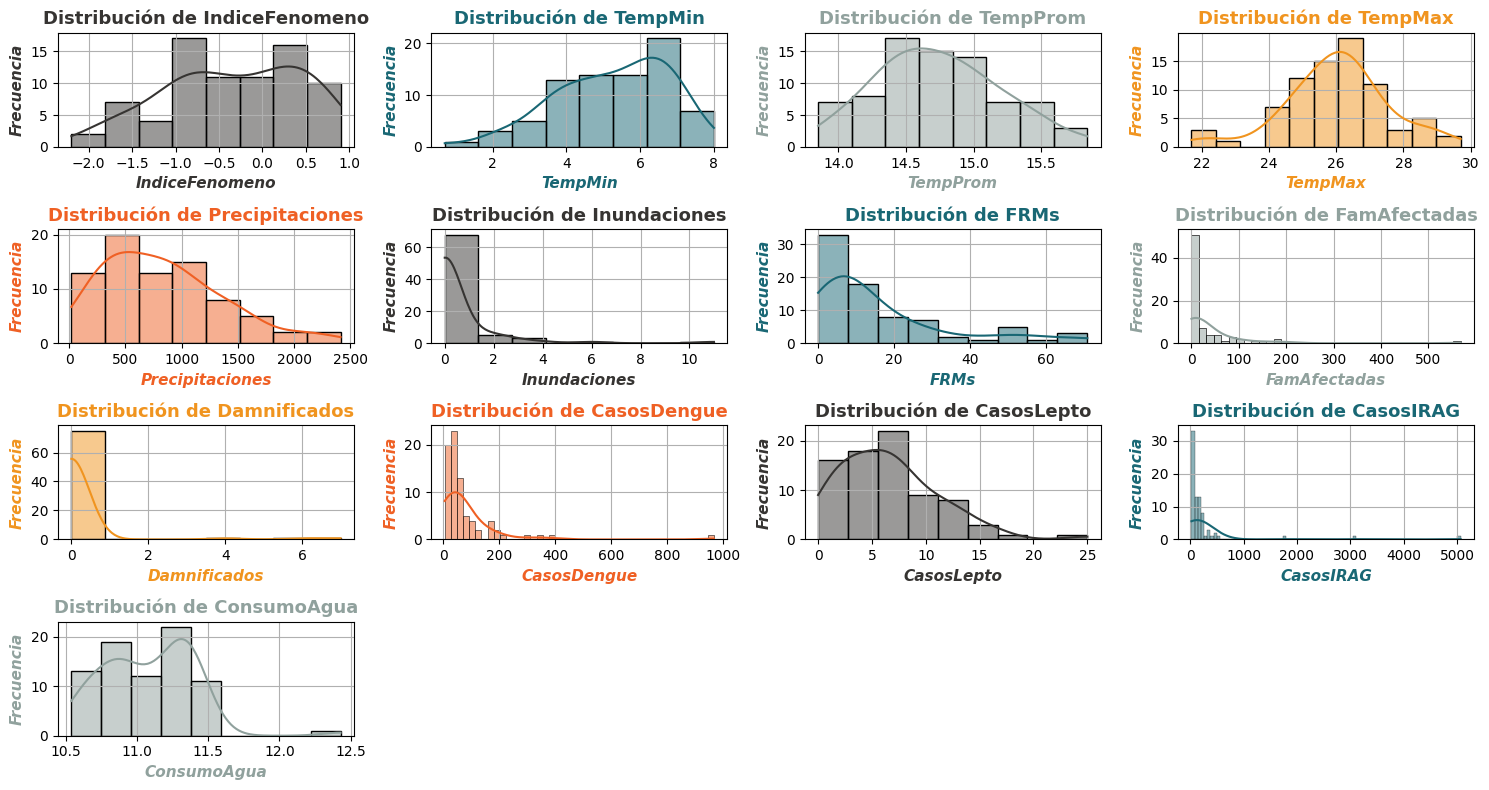

In [238]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(dataNum.columns):
    if c > 4:
        c = 0
    plt.subplot(4, 4, i + 1)
    sns.histplot(dataNum[column], kde=True, color=colores[c])
    plt.title(f"Distribución de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Frecuencia", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**
- En cuanto al Indice del Fenómeno podemos observar uan distribución bimodal sesgada levemente hacia la izquierda con mayor frecuencia de indices entre -1.0 y 0.5.
- En cuanto a la Temperatura mínima podemos observar una distribución sesgada hacia la izquierda con mayor frecuencia de temperaturas entre los 6 y 7°C.
- Con respecto a las temperaturas promedios podemos observar una distribución sesgada levemente hacia la derecha con mayor frecuencias de temperaturas entre los 14.4°C y 14.6° C.
- Con respecto a las temperaturas máximas podemos observar una distribución cercana a la normal aunque con mayor frecuencias de temperaturas entre los 26°C  y 26.5°C.
- Con respecto al volúmen de precipitaciones podemos observa una distribución sesgada hacia la derecha con mayor frecuencia de precipitaciones cercanas a los 500mm mensuales.
- Con respecto a la distribución de las inundaciones podemos observar una distribución sesgada extremadamente hacia la derecha con mayor frecuencia de inundaciones entre 0 y 1.
- En cuanto a la distribución de Fenómenos de Remosión observamos una distribución sesgada extremadamente hacia la derecha con mayor frecuencia de fenómenos por debajo de 8 al mes.
- En cuanto a la distribución de familias afectadas podemos observar una distribución extremadamente sesgada hacia la derecha con mayor frecuencia entre 0 y 15 familias al mes.
- Con respecto a la distribución de damnificados podemos observar un patrón similar al de famailias afectadas, con mayor frecuencia de 0 damnificados.
- Con respecto a las enferemedades de Dengue, podemos observar una distribución extremadamente sesgada hacia la derecha con mayor frecuencia de casos entre 0 y 200 por mes.
- Con respecto a las enfermedades de leptospirosis observamos una distribución sesgada a la derecha con mayor frecuencia de casos entre 0 y 10 por mes.
- Con respecto a los casos de Enfermedades Respiratorias, podemos una distribución extremadamente sesgada a la derecha con mayor frecuencia de casos entre 0 y 50 por mes.
- Con respecto a la distribución del consumo de agua podemos observar una distribución bimodal sesgada levemente a la derecha con mayor frecuencia en promedio de consumo entre 11.25m3 y 11.75 m3.

### **3.13.  Rango intercuartilico de los datos numéricos**

A continuación vamos a realizar un lienzo de gráficos de caja con las distribucioones de los datos numéricos, esto con el fin de identificar si existen valores alejados del rango de distribución de los datos.

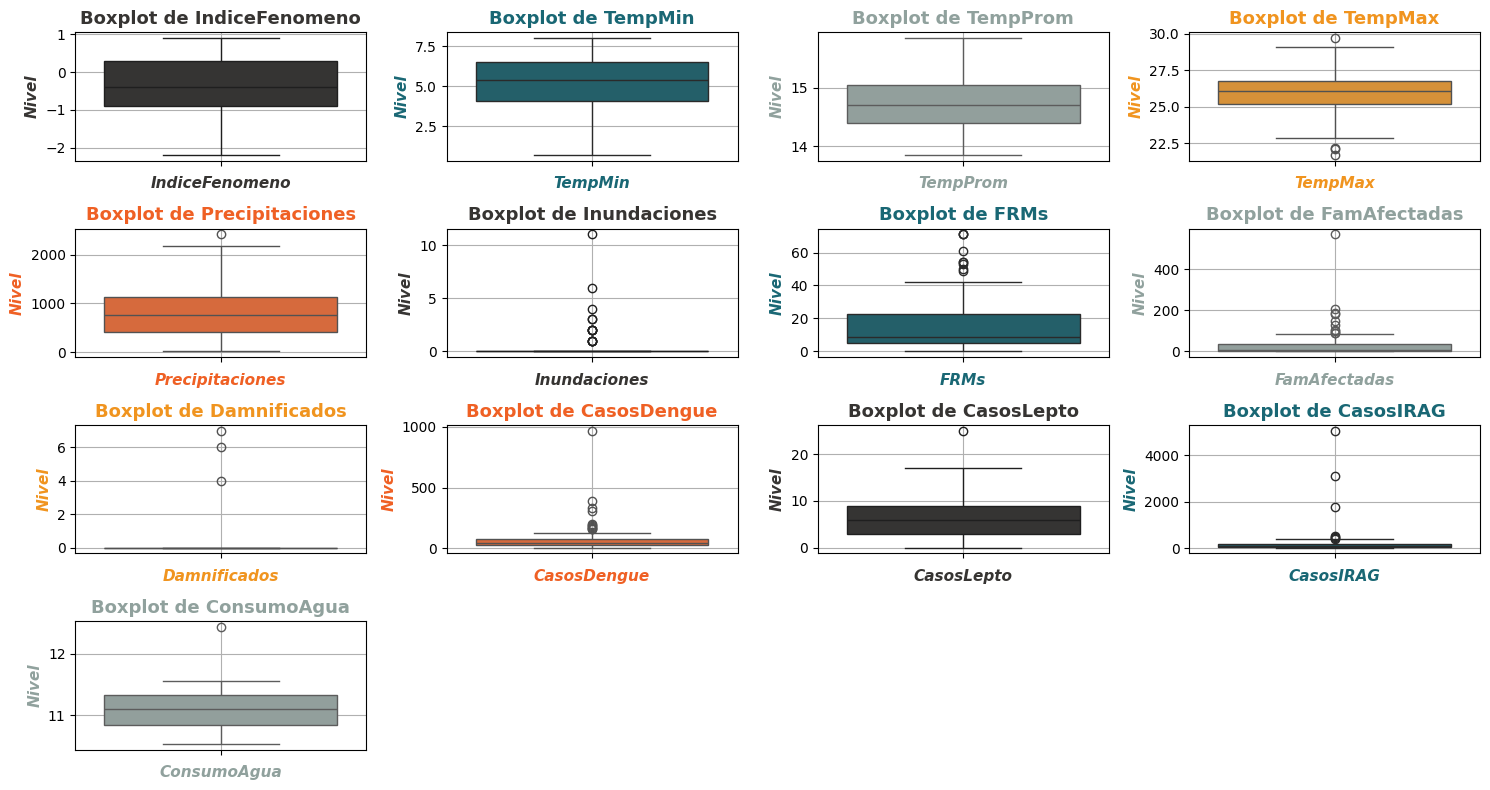

In [239]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(dataNum.columns):
    if c > 4:
        c = 0
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data= dataNum[column], color=colores[c])
    plt.title(f"Boxplot de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Nivel", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**
- Con respecto a la presencia de valores alejados del rango intercuatilico podemos observar lo siguiente:

- Las variables IndiceFenómeno, Temperatura Minima y Temperatura promedio, podemos observar que no existen valores alejados de la distribución de los datos.

- La variable temperatura maxima puede presentar valores outliers por encima de 29°C y por debajo de 22.5°C.
- Las variables de precipitaciones, Inundaciones, Fenomenos de remosión en masa, familias afectadas, damnificados, casos de dengue, casos de leptospirosis, casos de infecciones respiratorias y promedio consumo de agua presentan valores alejados del rango intercuatilico por encima de la distribución de los datos.

### **3.14.  Codificación de variables catégoricas**

En esta sección codificaremos las variables categóricas de nuestro dataframe original con el objetivo de mejorar el rendimiento de los modelos que vamos a realizar y poder realizar mejores análisis. Si bien, existen métodos de codificación como OneHotEncoder hemos decidido hacerlo manualmente con el fin de tener claros los números que reemplazarán las categorías.

In [240]:
#Creamos una copia de los datos sin la columna fecha.
dataCod = data.drop(columns=["Fecha"])

In [241]:
# Creamos los diccionarios que nos permiten establecer los valores de reemplazo.

mapFenom = {"Neutro": 0, "Niña": 1, "Niño": 2}
mapClas = {"Neutro": 0, "Debil": 1, "Moderado": 2, "Fuerte": 3}
mapTempo = {"Seca": 0, "Lluvias": 1}

In [242]:
# Reemplazamos los valores usando el método map.

dataCod["Fenomeno"] = dataCod["Fenomeno"].map(mapFenom)
dataCod["ClasFenomeno"] = dataCod["ClasFenomeno"].map(mapClas)
dataCod["Temporada"] = dataCod["Temporada"].map(mapTempo)

### **3.15.  Análisis de correlaciones (Pearson)**

En esta sección haremos una revisión de las relaciones entre variables para determinar si una variable afecta a otras variables, para esto harémos gráficos y una matriz de correlación de Pearson.

**Nota:** Esta correlación mide la relación lineal entre variables continuas, sin embargo es sensible a valores atípicos y requiere que las variables sigan una distribución normal, lo cual no es muy evidente en los análisis previos que hicimos. Por lo que también haremos una correlación de Spearman.

In [243]:
coloresB = ["#8FC1B5", "#589A8D", "#007566", "#146551", "#265C4B"]

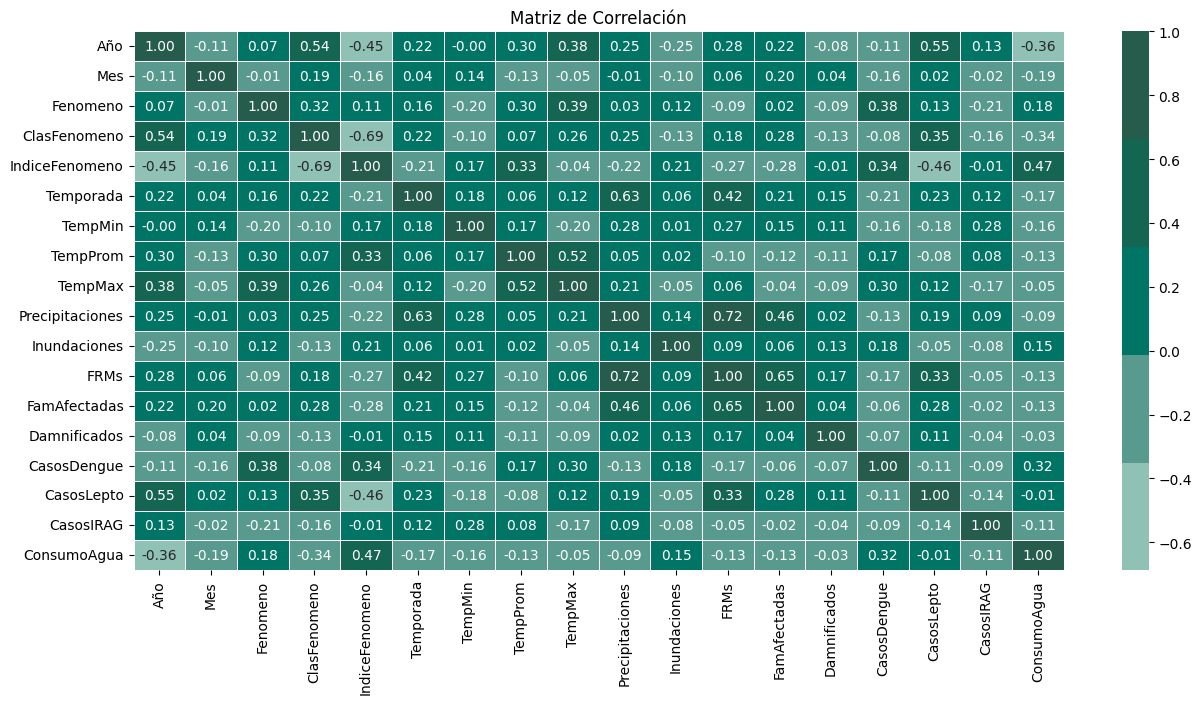

In [244]:
# Creamos la matriz de correlación usando el método corr()
matrizCorrelacion = dataCod.corr()

# Creamos un mapa de calor que nos permite identificar las relaciones entre los datos.

plt.figure(figsize=(15, 7))
sns.heatmap(matrizCorrelacion, annot=True, cmap=coloresB, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Notas:**
- Si revisamos la temporalidad de los datos, observamos que existe una correlación positiva significativa en la clasificación del fenómeno, por lo que en los últimos años la clasificación de los fenómenos tiene una tendencia a ser maypor, también las temperaturas maximas pudieron haber aumentado en los últimos años, así como el número de casos de leptospirosis.
- Con respecto a las temporadas podemos observar una clara correlación con el número de precipitaciones y Fenómenos de remosión en masa a causa del fenómeno de la niña, así como una relación importante entre el número de precipitaciones la cantidad de Fenomenos de Remosión en Masa.
- También los fenomenos de remosión en masa tienen una alta correlación con el número de familias afectadas.
- El consumo de agua tiene una correlación significativa con el indice del Fenómeno, a medida que aumenta el indice superando la barrera de oscilación de 0.5°C donde se considera como fenómeno del niño, aumenta el consumo de agua.

### **3.16.  Análisis de correlaciones (Spearman)**

En esta sección haremos una revisión de las relaciones entre variables para determinar si una variable afecta a otras variables, para esto harémos gráficos y una matriz de correlación de Spearman.

**Nota:** Esta correlación mide la correlación basada en rangos que no asumen relación lineal ni normalidad. Es más robusta frente a los valores atípicos.

In [245]:
# Calculamos el coeficiente de correlación de Spearman
spearmanCorr = dataCod.corr(method='spearman')

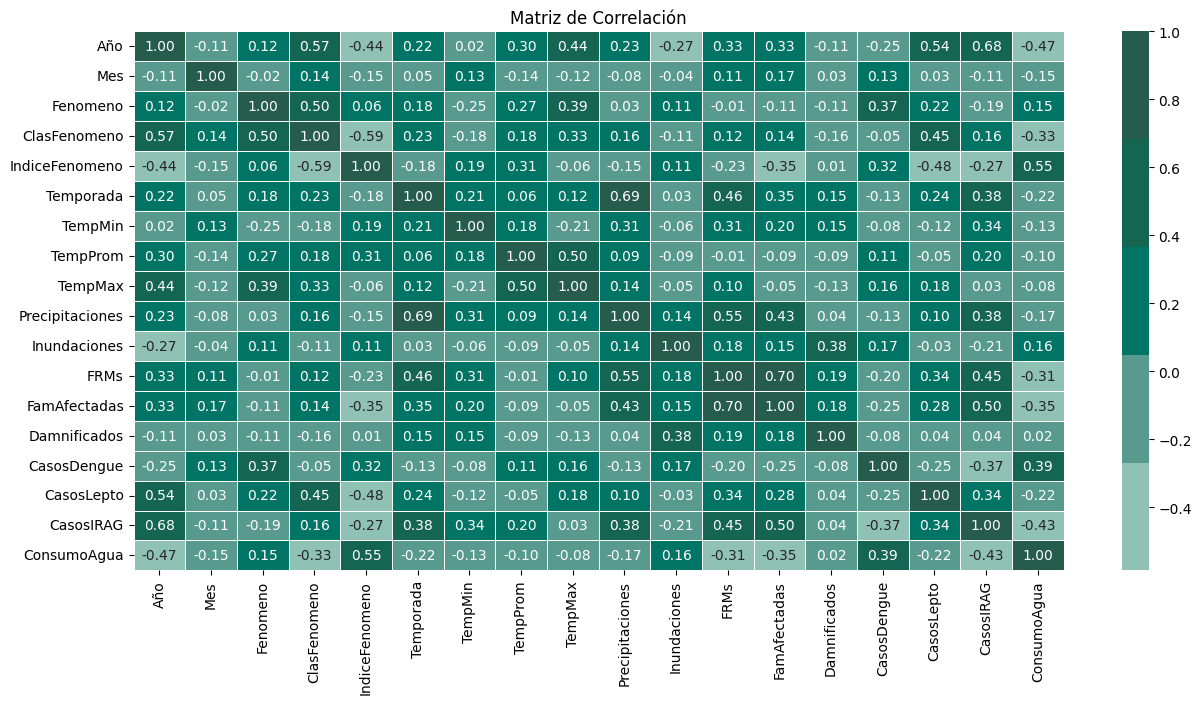

In [246]:
# Graficamos el coeficiente en un heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(spearmanCorr, annot=True, cmap=coloresB, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Notas:**
- Si revisamos la temporalidad de los datos, observamos que existe una correlación positiva significativa en la clasificación del fenómeno, por lo que en los últimos años la clasificación de los fenómenos tiene una tendencia a ser maypor, también las temperaturas maximas pudieron haber aumentado en los últimos años, así como el número de casos de leptospirosis e infecciones respiratorias.
- Con respecto a las temporadas podemos observar una clara correlación con el número de precipitaciones y Fenómenos de remosión en masa a causa del fenómeno de la niña, así como una relación importante entre el número de precipitaciones la cantidad de Fenomenos de Remosión en Masa.
- También los fenomenos de remosión en masa tienen una alta correlación con el número de familias afectadas.
- El consumo de agua tiene una correlación significativa con el indice del Fenómeno, a medida que aumenta el indice superando la barrera de oscilación de 0.5°C donde se considera como fenómeno del niño, aumenta el consumo de agua. También una relación positiva con el número de casos de dengue.

### **3.17.  Análisis de Correspondencia Múltiple**

En esta sección hacemos un análisis que nos permite explorar la estructura de las relaciones entre las variables categóricas, reduciendo la dimensionalidad de los datos y representarlos en dos dimensiones para visualizar y explorar las relaciones entre las categorías de variables.

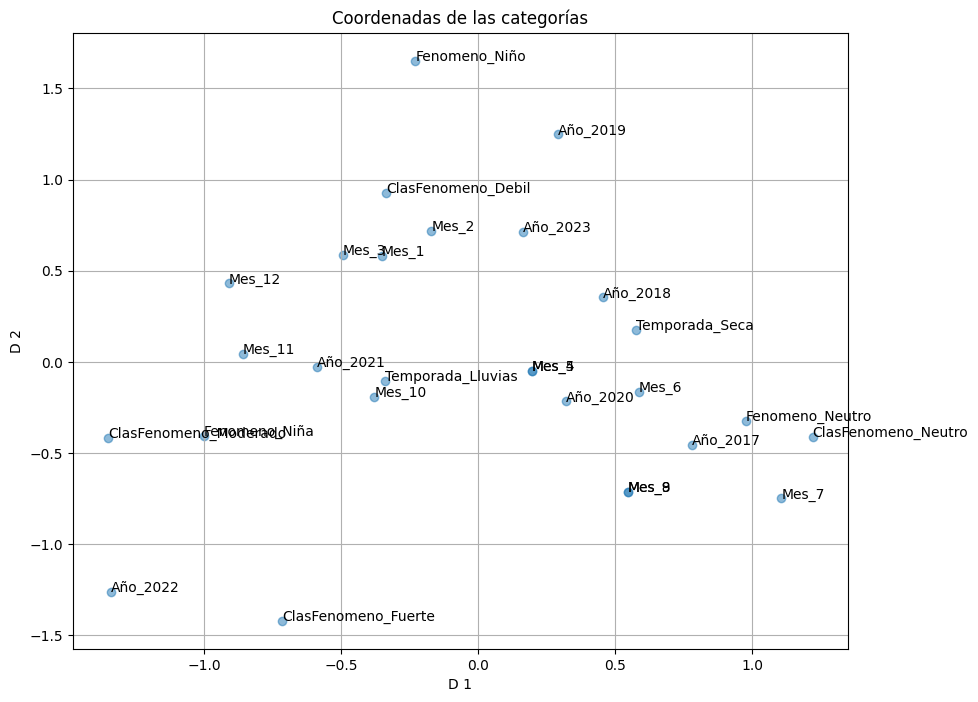

In [247]:
mca = MCA()
mca.fit(dataCat)

# Extraemos las coordenadas de las variables y las categorías
coordinates = mca.column_coordinates(dataCat)

# Graficamos las coordenadas en un gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], alpha=0.5)
plt.xlabel('D 1')
plt.ylabel('D 2')
plt.title('Coordenadas de las categorías')
for i, txt in enumerate(coordinates.index):
    plt.annotate(txt, (coordinates.iloc[i, 0], coordinates.iloc[i, 1]))
plt.grid(True)
plt.show()

**Notas:**

- Podemos observar que los meses 10 y 11 (octubre y noviembre) tiene mayor fuerza de asociación con la temporada de lluvias, así como una asociación alta entre el año 2021 y la temporada de lluvias.
- Se puede observar una asociación fuertemente negativa entre el fenómeno del niño y ser clasificado como fenómeno fuerte.
- Se puede observar una mayor asoación entre el año 2018 y la temporada seca.
- Se puede observar que el año 2017 puede tener una alta asociación con fenomenos neutros, asi como los meses de julio y agosto.

### **3.18.  Coeficiente de correlación usando Dummies**

En este análisis convertimos el dataframe original a variables dummies para observar si existen relaciones entre cada una de las categorías de las variables.

In [248]:
# Convertimos variables categóricas a variables dummies
dataDummie = pd.get_dummies(dataCat)

# Calculamos la matriz de correlación
matrizCorrDum = dataDummie.corr()

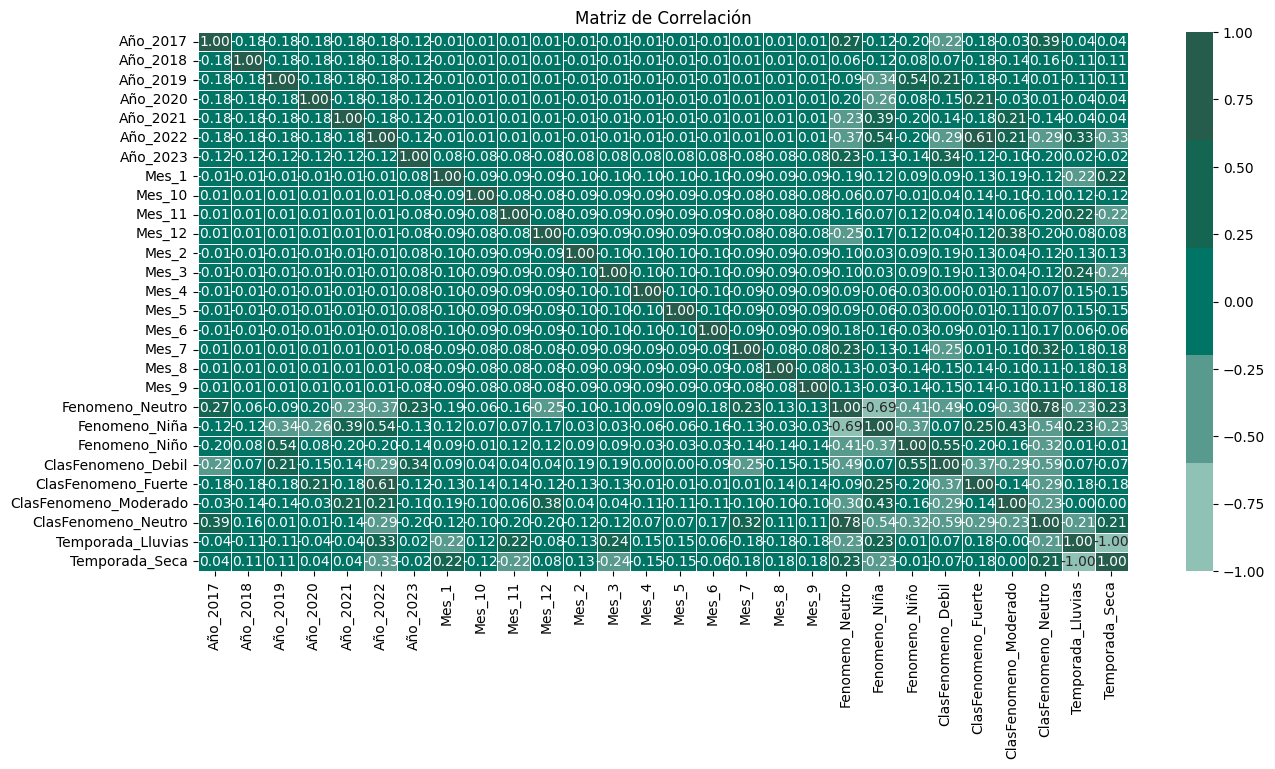

In [249]:
# Creamos un mapa de calor que nos permite identificar las relaciones entre los datos.
plt.figure(figsize=(15, 7))
sns.heatmap(matrizCorrDum, annot=True, cmap=coloresB, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Notas:**
- En este análisis observamos las indicendcias que tuvieron los fenómenos en la temporalidad de los datos, observando que en el año 2022 tuvo mayor presencia el fenómeno de la niña y calsifcado como fuerte.

### **3.19.  Escalado de variables numéricas**

En esta sección escalamos las variables numéricas ya que las caracteristicas del dataframe tienen diferentes unidades y escalas numéricas, lo que puede ocasionar problemas en los algoritmos que son sensibles a la escala de los datos.

In [250]:
# Creamos una copia de los datos
dataMod = dataCod.copy()

# Inicializamos el escalador
scaler = StandardScaler()

# Escalamos las variables numericas
numericasEscaladas = scaler.fit_transform(dataNum)

dataMod[["IndiceFenomeno", "TempMin", "TempProm", "TempMax", "Precipitaciones", "Inundaciones", "FRMs",
            "FamAfectadas", "Damnificados", "CasosDengue", "CasosLepto", "CasosIRAG", "ConsumoAgua"]] = numericasEscaladas

### **3.20.  División del conjunto de entrenamiento y prueba**

En esta sección vamos a dividir los conjuntos de entrenamiento y prueba, asi como usar dos bases para la creación de los modelos, una base sin estandarizar las variables numericas y otra con la estandarización.

In [251]:
dataCod["Año"] = dataCod["Año"].astype(int)
dataCod["Mes"] = dataCod["Mes"].astype(int)

In [252]:
# X1 y Y1 representan el dataset sin la estandarización.
X1 = dataCod.drop("ConsumoAgua", axis=1)
Y1 = dataCod["ConsumoAgua"]

# Dividimos el conjunto de datos en train y test.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Verificamos el tamaño del conjunto de entrenamiento
print("Tamaño del conjunto de entrenamiento:")
print("Número de filas:", X_train1.shape[0])
print("Número de columnas:", X_train1.shape[1])

# Verificamos el tamaño del conjunto de prueba
print("\nTamaño del conjunto de prueba:")
print("Número de filas:", X_test1.shape[0])
print("Número de columnas:", X_test1.shape[1])

Tamaño del conjunto de entrenamiento:
Número de filas: 62
Número de columnas: 17

Tamaño del conjunto de prueba:
Número de filas: 16
Número de columnas: 17


In [253]:
dataMod["Año"] = dataMod["Año"].astype(int)
dataMod["Mes"] = dataMod["Mes"].astype(int)

In [254]:
# X2 y Y2 representan el dataset con la estandarización.
X2 = dataMod.drop("ConsumoAgua", axis=1)
Y2 = dataMod["ConsumoAgua"]

# Dividimos el conjunto de datos en train y test.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Verificamos el tamaño del conjunto de entrenamiento
print("Tamaño del conjunto de entrenamiento:")
print("Número de filas:", X_train2.shape[0])
print("Número de columnas:", X_train2.shape[1])

# Verificamos el tamaño del conjunto de prueba
print("\nTamaño del conjunto de prueba:")
print("Número de filas:", X_test2.shape[0])
print("Número de columnas:", X_test2.shape[1])

Tamaño del conjunto de entrenamiento:
Número de filas: 62
Número de columnas: 17

Tamaño del conjunto de prueba:
Número de filas: 16
Número de columnas: 17


## **4. Creación y entrenamiento de Modelos | Modeling**
---
En esta sección seleccionaremos y aplicaremos técnicas de modelado para construir modelos predictivos, probando tres tipos de algoritmos y configurandolos para encontrar el mejor modelado de datos.

### **4.1.  Regresión lineal**

Este es uno de los modelos más utilizados, aunque es muy importante que exista una relación lineal entre las variables independientes y la variable objetivo, por lo que posiblemente no sea tan bueno para estos casos donde no hay una correlación evidente y directa entre las variables.

In [255]:
# Creamos el modelo usando la clase LinearRegression.
modeloLin1 = LinearRegression()

# Entrenamos el modelo
modeloLin1.fit(X_train1, y_train1)

# Realizamos las predicciones en el conjunto de prueba
yPredLin1 = modeloLin1.predict(X_test1)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test1, yPredLin1))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test1, yPredLin1))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test1, yPredLin1))

Error cuadrático medio (MSE):
0.15569972287982717
Error absoluto medio (MAE):
0.27602256613219367
Coeficiente de determinación (R2):
0.1530848685035503


In [256]:
# Creamos el modelo usando la clase LinearRegression.
modeloLin2 = LinearRegression()

# Entrenamos el modelo
modeloLin2.fit(X_train2, y_train2)

# Realizamos las predicciones en el conjunto de prueba
yPredLin2 = modeloLin2.predict(X_test2)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test2, yPredLin2))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test2, yPredLin2))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test2, yPredLin2))

Error cuadrático medio (MSE):
1.520781433722108
Error absoluto medio (MAE):
0.862648894797417
Coeficiente de determinación (R2):
0.15308486850354874


In [257]:
# Creamos la función que nos permitirá graficar los predichos vs los reales.
def grafPredic(ax, y_test, y_pred, title):
    ax.scatter(y_test, y_pred, color=color5, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
    ax.set_xlabel("Valores Reales", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
    ax.set_ylabel("Valores Predichos", fontsize=12, color=color1, fontstyle="italic", fontweight="bold")
    ax.set_title(title, fontsize=16, color=color1, fontweight="bold")
    ax.grid(True)

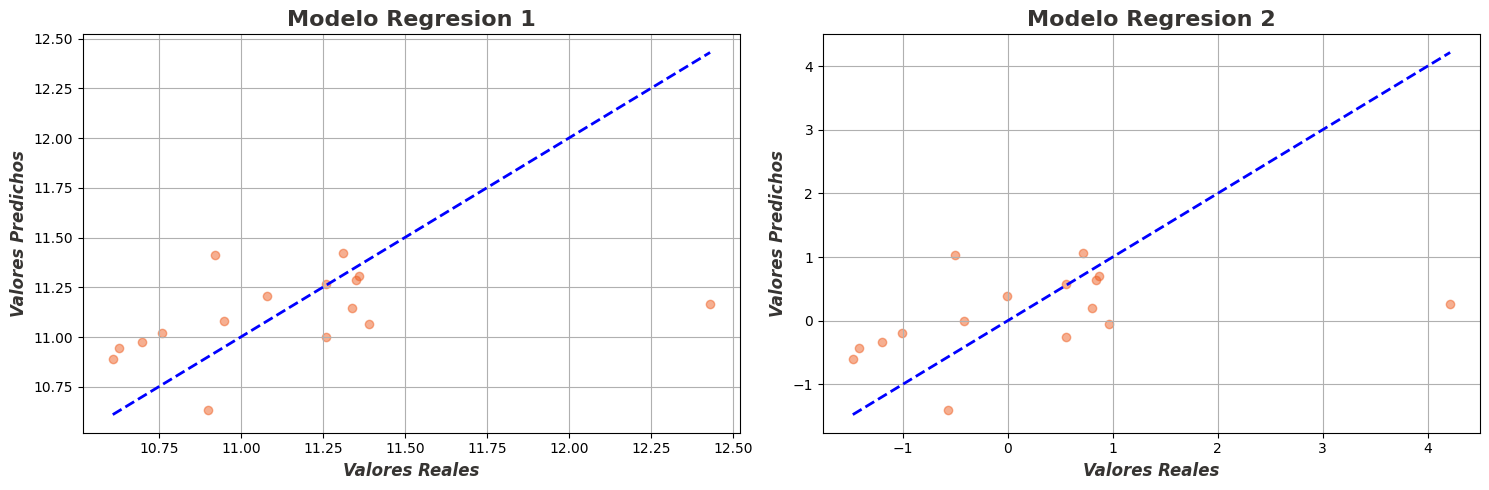

In [258]:
# Creamos el lienzo con dos gráficos en una sola fila
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graficamos las predicciones del modelo
grafPredic(axs[0], y_test1, yPredLin1, "Modelo Regresion 1")

# Graficamos las predicciones del modelo
grafPredic(axs[1], y_test2, yPredLin2, "Modelo Regresion 2")

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Notas:**

**Modelo Lin1:**

> - El Error Cuadrático Medio (o.15) sugiere, que en promedio, los errores al cuadrado son relativamente pequeños.
> - El Error Absoluto Medio (0.27) sugiere, que en promedio las predicciones están a 0.27 unidades del valor real, lo cual es un buen valor de cercanía a los valores reales.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 15% de la variabilidad de los datos.

**Modelo Lin2:**

> - El Error Cuadrático Medio (1.52) sugiere, que en promedio, los errores al cuadrado son más grandes que en el modelo 1, con más de 1 punto de diferencia.
> - El Error Absoluto Medio (0.86) sugiere, que en promedio las predicciones están a 0.86 unidades del valor real, lo cual es un valor más alto comparado al modelo 1.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 15% de la variabilidad de los datos, muy similar al modelo 1.

**Conclusión:**

> - El Modelo 1 tiene valores de MSE y MAE mucho más bajos que el Modelo 2, lo que indica que el Modelo 1 tiene un mejor ajuste en términos de los errores promedio y absolutos.
> - Sin embargo ambos modelos no son capaces de explicar la variabilidad de los datos, solo explicando el 15%.

En resumen, el Modelo 1 parece ser el mejor entre los dos modelos, sin embargo no es suficiente.

### **4.2.  Bosque Aleatorio**

En este caso vamos a usar un modelo que consiste en un conjunto de arboles de decisión que se entrenan de manera independiente y posteriormente se combinan para realizar predicciones.

In [259]:
# Creamos el modelo usando la clase RandomForestRegressor
modeloRan1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
modeloRan1.fit(X_train1, y_train1)

# Realizamos las predicciones en el conjunto de prueba
yPredRan1 = modeloRan1.predict(X_test1)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test1, yPredRan1))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test1, yPredRan1))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test1, yPredRan1))

Error cuadrático medio (MSE):
0.18317139062500035
Error absoluto medio (MAE):
0.23448125000000064
Coeficiente de determinación (R2):
0.003655115704391476


In [260]:
# Creamos el modelo usando la clase RandomForestRegressor
modeloRan2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
modeloRan2.fit(X_train2, y_train2)

# Realizamos las predicciones en el conjunto de prueba
yPredRan2 = modeloRan2.predict(X_test2)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test2, yPredRan2))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test2, yPredRan2))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test2, yPredRan2))

Error cuadrático medio (MSE):
1.7649837424850099
Error absoluto medio (MAE):
0.7315313067461631
Coeficiente de determinación (R2):
0.017089895227552


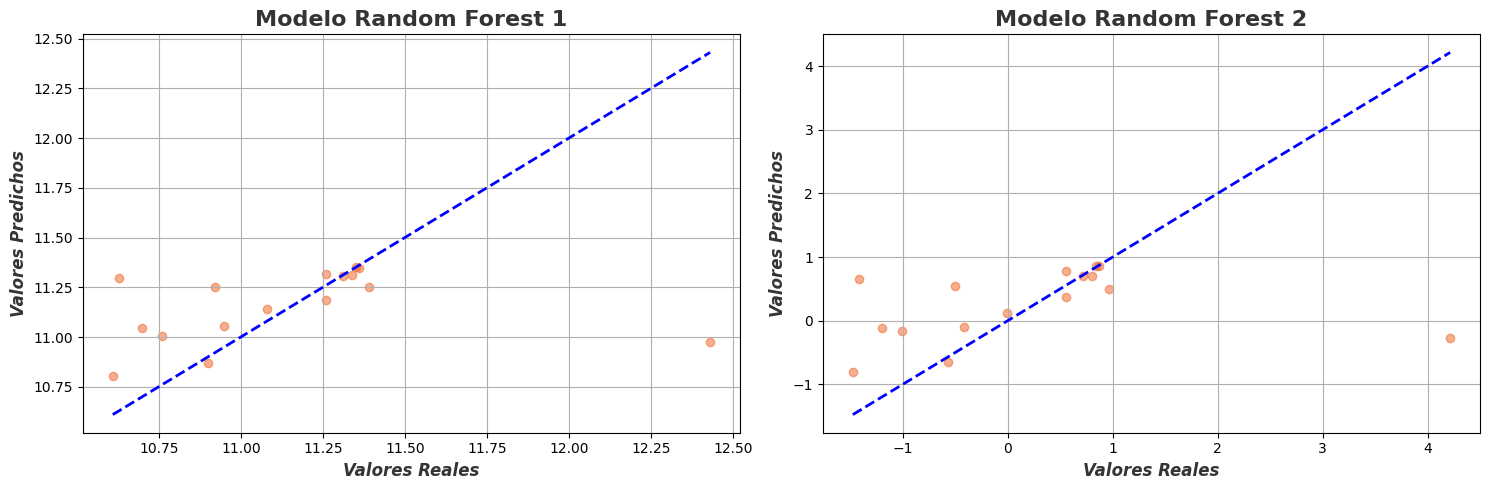

In [261]:
# Creamos el lienzo con dos gráficos en una sola fila
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graficamos las predicciones del modelo
grafPredic(axs[0], y_test1, yPredRan1, "Modelo Random Forest 1")

# Graficamos las predicciones del modelo
grafPredic(axs[1], y_test2, yPredRan2, "Modelo Random Forest 2")

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Notas:**

**Modelo Ran1:**

> - El Error Cuadrático Medio (0.18) sugiere, que en promedio, los errores al cuadrado son relativamente pequeños aunque mayores al modelo de regresión lineal.
> - El Error Absoluto Medio (0.23) sugiere, que en promedio las predicciones están a 0.23 unidades del valor real, lo cual es un buen valor de cercanía a los valores reales, mejor que el modelo de regresión lineal.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 0.003% de la variabilidad de los datos, un rendimiento muy bajo.

**Modelo Ran2:**

> - El Error Cuadrático Medio (1.76) sugiere, que en promedio, los errores al cuadrado son más grandes que en el modelo 1, con más de 1 punto de diferencia.
> - El Error Absoluto Medio (0.73) sugiere, que en promedio las predicciones están a 0.86 unidades del valor real, lo cual es un valor más alto comparado al modelo 1.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 1% de la variabilidad de los datos, un rendimiento muy bajo.

**Conclusión:**

> - El Modelo 1 tiene valores de MSE y MAE mucho más bajos que el Modelo 2, lo que indica que el Modelo 1 tiene un mejor ajuste en términos de los errores promedio y absolutos.
> - Sin embargo ambos modelos no son capaces de explicar la variabilidad de los datos, solo explicando el 1%.

En resumen, el Modelo 1 parece ser el mejor entre los dos modelos, sin embargo no es suficiente y su rendimiento es menor al modelo de regresión lineal.

### **4.3.  Modelo XGBoost**

En este caso vamos a usar un modelo basado en árboles que es muy popular debido a su alta eficiencia, flexibilidad y rendimiento que nos permite enfrentarnos a problemas de clasificación y de regresión.

In [262]:
# Creamos el modelo usando la clase XGBRegressor
modeloXGB1 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Entrenamos el modelo
modeloXGB1.fit(X_train1, y_train1)

# Realizamos las predicciones en el conjunto de prueba
yPredXGB1 = modeloXGB1.predict(X_test1)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test1, yPredXGB1))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test1, yPredXGB1))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test1, yPredXGB1))

Error cuadrático medio (MSE):
0.1385521986300722
Error absoluto medio (MAE):
0.23421700477600116
Coeficiente de determinación (R2):
0.24635733865449982


In [263]:
# Creamos el modelo usando la clase XGBRegressor
modeloXGB2 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Entrenamos el modelo
modeloXGB2.fit(X_train2, y_train2)

# Realizamos las predicciones en el conjunto de prueba
yPredXGB2 = modeloXGB2.predict(X_test2)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test2, yPredXGB2))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test2, yPredXGB2))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test2, yPredXGB2))

Error cuadrático medio (MSE):
1.3393483768274064
Error absoluto medio (MAE):
0.7253336705847461
Coeficiente de determinación (R2):
0.254123977628981


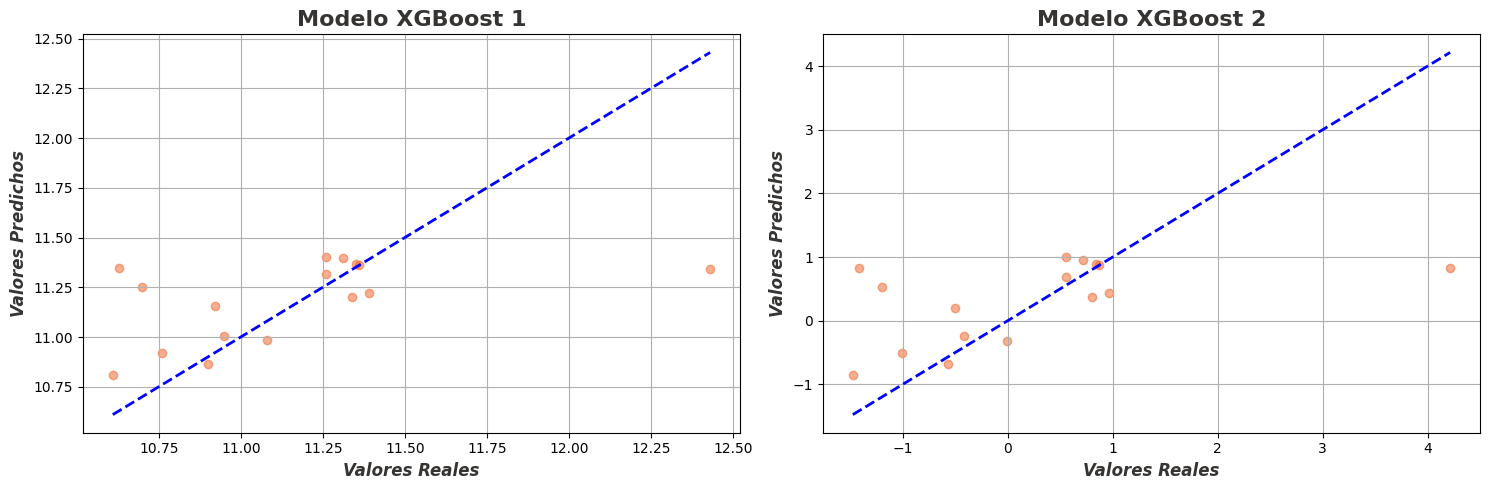

In [264]:
# Creamos el lienzo con dos gráficos en una sola fila
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graficamos las predicciones del modelo
grafPredic(axs[0], y_test1, yPredXGB1, "Modelo XGBoost 1")

# Graficamos las predicciones del modelo
grafPredic(axs[1], y_test2, yPredXGB2, "Modelo XGBoost 2")

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Notas:**

**Modelo XGB1:**

> - El Error Cuadrático Medio (0.13) sugiere, que en promedio, los errores al cuadrado son relativamente pequeños, superando al modelo de regresión lineal en esta métrica.
> - El Error Absoluto Medio (0.23) sugiere, que en promedio las predicciones están a 0.23 unidades del valor real, lo cual es un buen valor de cercanía a los valores reales, superando al modelo de regresión lineal.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 24% de la variabilidad de los datos, aunque supera al modelo de regresión lineal en este sentido.

**Modelo XGB2:**

> - El Error Cuadrático Medio (1.33) sugiere, que en promedio, los errores al cuadrado son más grandes que en el modelo 1, con más de 1 punto de diferencia.
> - El Error Absoluto Medio (0.72) sugiere, que en promedio las predicciones están a 0.72 unidades del valor real, lo cual es un valor más alto comparado al modelo 1.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 25% de la variabilidad de los datos, sin embargo es el modelo con mejor métrica en este setido.

**Conclusión:**

> - El Modelo 1 tiene valores de MSE y MAE mucho más bajos que el Modelo 2, lo que indica que el Modelo 1 tiene un mejor ajuste en términos de los errores promedio y absolutos.
> - Sin embargo ambos modelos no son capaces de explicar la variabilidad de los datos, solo explicando el 24/25%.

En resumen, el Modelo 1 parece ser el mejor entre los dos modelos, superando al modelo de regresión lineal.

## **5. Evaluación de los modelos | Modeling**
---
Teniendo en cuenta que el rendimiento de los modelos puede mejorar, vamos a realizar algunas técnicas y las evaluaremos si impactan en el modelo.

### **5.1.  Selección de características**

Teniendo en cuenta que no hemos filtrado las caracteristicas que mayor relevancia pueden tener para nuestra variable objetivo, es importante mencionar, que los resultados de los modelos podrían mejorar si seleccionamos las variables que tienen una mayor capacidad explicativa con la variable objetivo.

In [265]:
# Vamos a seleccionar solo 5 características clave.
k = 5
# Creamos el selector.
selector = SelectKBest(score_func=f_regression, k=k)
XSelec = selector.fit_transform(X1, Y1)

variablesSelec = X1.columns[selector.get_support()]
print(variablesSelec)

Index(['Año', 'Mes', 'ClasFenomeno', 'IndiceFenomeno', 'CasosDengue'], dtype='object')


### **5.2.  División conjunto entrenamiento y prueba con selección de caracteristicas**

Una vez identificadas las variables más importantes para predecir la variable objetivo volvemos a entrenar los modelos.

In [266]:
# X3 y Y3 representan el dataset sin la estandarización.
X3 = dataCod[variablesSelec]
Y3 = dataCod["ConsumoAgua"]

# Dividimos el conjunto de datos en train y test.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42)

# X4 y Y4 representan el dataset con la estandarización.
X4 = dataMod[variablesSelec]
Y4 = dataMod["ConsumoAgua"]

# Dividimos el conjunto de datos en train y test.
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42)

### **5.3.  Reentrenamiento del modelo elegido**

Una vez identificado el modelo con mejor comportamiento (XGBoost), vamos a reentrenarlo para saber si mejoró en sus metricas.

In [267]:
# Creamos el modelo usando la clase XGBRegressor
modeloXGB3 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Entrenamos el modelo
modeloXGB3.fit(X_train3, y_train3)

# Realizamos las predicciones en el conjunto de prueba
yPredXGB3 = modeloXGB3.predict(X_test3)

# MSE
print("Error cuadrático medio (MSE):")
print(mean_squared_error(y_test3, yPredXGB3))

# MAE
print("Error absoluto medio (MAE):")
print(mean_absolute_error(y_test3, yPredXGB3))

# R2
print("Coeficiente de determinación (R2):")
print(r2_score(y_test3, yPredXGB3))

Error cuadrático medio (MSE):
0.14331231472503247
Error absoluto medio (MAE):
0.22195763349533093
Coeficiente de determinación (R2):
0.2204651002231367


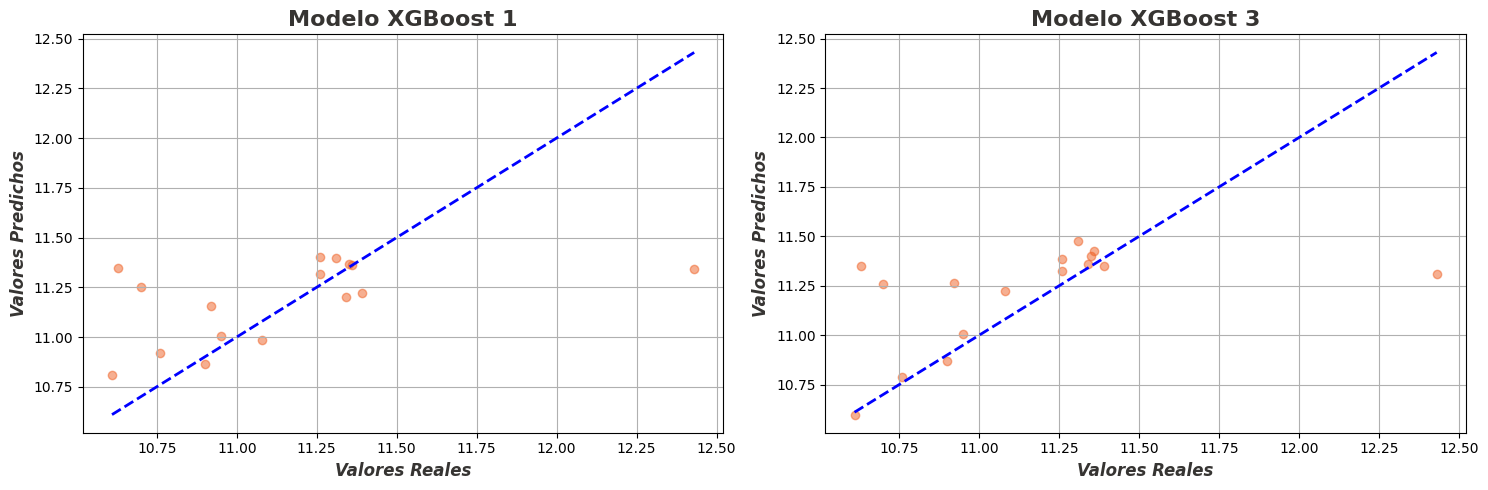

In [268]:
# Creamos el lienzo con dos gráficos en una sola fila
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graficamos las predicciones del modelo
grafPredic(axs[0], y_test1, yPredXGB1, "Modelo XGBoost 1")

# Graficamos las predicciones del modelo
grafPredic(axs[1], y_test3, yPredXGB3, "Modelo XGBoost 3")

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Notas:**

**Modelo XGB3:**

> - El Error Cuadrático Medio pasó de 0.13 a 0.14 sugiere, que en promedio, los errores al cuadrado son relativamente pequeños sin embargo el modelo de XgBoost 1 tiene levemente un mejor indicador.
> - El Error Absoluto Medio pasó de 0.23 a 0.22, sugiere, que en promedio las predicciones están a 0.22 unidades del valor real, lo cual es un buen valor de cercanía a los valores reales, superando al modelo 1.
> - El Coeficiente de Determinación indica que el modelo no está capturando la relación entre las características y la variable objetivo, ya que solo es capaz de explicar el 22% de la variabilidad de los datos, por lo que el modelo de XGBoost presentaba mejor métrica.

**Conclusión:**

> - El Modelo XGBoost 1 tiene valores de MSE y MAE mucho más bajos que el XGboost 2, lo que indica que el Modelo 1 tiene un mejor ajuste en términos de los errores promedio y absolutos.
> - Sin embargo ambos modelos no son capaces de explicar la variabilidad de los datos, solo explicando el 24/22%.

En resumen, el Modelo 1 parece ser el mejor entre los dos modelos, sin embargo en la gráfica parece ser que es mejor el modelo 3, al ajustarse más a los valores reales.

## **6. Mejorar el modelo**

### **6.1. Ajuste de Hiperparametros con GridSearchCV**

El ajuste de hiperparámetros puede mejorar significativamente el rendimiento del modelo XGBoost.

In [203]:
# Definir el modelo
modeloXGB = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir el rango de hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=modeloXGB, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train3, y_train3)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train3, y_train3)

# Realizar predicciones en el conjunto de prueba
y_pred_best = best_model.predict(X_test3)

# Calcular métricas de desempeño
mse_best = mean_squared_error(y_test3, y_pred_best)
mae_best = mean_absolute_error(y_test3, y_pred_best)
r2_best = r2_score(y_test3, y_pred_best)

print("Mejores métricas de desempeño:")
print("MSE:", mse_best)
print("MAE:", mae_best)
print("R2:", r2_best)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Mejores métricas de desempeño:
MSE: 0.1316327239873516
MAE: 0.21250343084335344
R2: 0.2839952205243932


**Notas**

**MSE (Error Cuadrático Medio)**

El MSE ha mejorado de 0.1433 a 0.1316. Esto indica que el modelo ajustado tiene un error promedio más bajo en las predicciones.

**MAE (Error Absoluto Medio)**

El MAE ha mejorado de 0.2220 a 0.2125. Esto indica que el error absoluto promedio también ha disminuido, mejorando la precisión del modelo.

**R² (Coeficiente de Determinación)**

El R² ha mejorado de 0.2205 a 0.2840. Esto sugiere que el modelo ahora explica mejor la variabilidad de los datos, aunque todavía hay espacio para mejoras adicionales.

## **6.2. Revision aleatoria de hiperparametros**

Aunque el ajuste de hiperparametros mejoro el modelo Vamos a realizar una revision adicional sobre la búsqueda aleatoria de hiperparámetros

In [204]:
# Definir el modelo
modeloXGB3 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir la distribución de hiperparámetros
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modeloXGB3, param_distributions=param_distributions,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2, random_state=42)

# Ejecutar la búsqueda aleatoria
random_search.fit(X_train3, y_train3)
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros de búsqueda aleatoria: {best_params_random}")

# Entrenar el mejor modelo encontrado
best_model_random = random_search.best_estimator_
yPredXGB3_random = best_model_random.predict(X_test3)

# Evaluar el rendimiento del modelo
print("Error cuadrático medio (MSE) aleatorio:")
print(mean_squared_error(y_test3, yPredXGB3_random))

print("Error absoluto medio (MAE) aleatorio:")
print(mean_absolute_error(y_test3, yPredXGB3_random))

print("Coeficiente de determinación (R2) aleatorio:")
print(r2_score(y_test3, yPredXGB3_random))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros de búsqueda aleatoria: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Error cuadrático medio (MSE) aleatorio:
0.10115356925787124
Error absoluto medio (MAE) aleatorio:
0.18290146827697773
Coeficiente de determinación (R2) aleatorio:
0.4497839377948908


**Notas**

El ajuste de hiperparámetros mediante búsqueda aleatoria ha mostrado una mejora significativa en las métricas de desempeño del modelo.

**Mejora en Desempeño:**

La búsqueda aleatoria ha proporcionado mejores métricas en comparación con la búsqueda en malla (GridSearchCV):
MSE mejoró de 0.1316 a 0.1012.
MAE mejoró de 0.2125 a 0.1829.
R² mejoró de 0.2840 a 0.4498.
Mayor Complejidad del Modelo:

**Validez de los Resultados:**

Dado que la búsqueda aleatoria resultó en un mejor rendimiento, podríamos optar por los hiperparámetros encontrados a través de esta técnica.


## **6.3. Validacion Cruzada con los mejores hiperparametros**

Realizamos una validación cruzada adicional con estos mejores hiperparámetros para asegurar la estabilidad y robustez del modelo.

In [205]:
# Definir el modelo con los mejores hiperparámetros de la búsqueda aleatoria
best_model_random = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=0.6,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=100,
    max_depth=12,
    learning_rate=0.2,
    colsample_bytree=1.0,
    random_state=42
)

# Realizar validación cruzada
cv_scores_random = cross_val_score(best_model_random, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
cv_mse_random = -cv_scores_random.mean()
cv_std_random = cv_scores_random.std()

print("Validación Cruzada - MSE Promedio (Búsqueda Aleatoria):", cv_mse_random)
print("Validación Cruzada - Desviación Estándar del MSE (Búsqueda Aleatoria):", cv_std_random)

# Entrenar el modelo con todos los datos de entrenamiento
best_model_random.fit(X_train3, y_train3)

# Realizar predicciones en el conjunto de prueba
y_pred_best_random = best_model_random.predict(X_test3)

# Calcular métricas de desempeño en el conjunto de prueba
mse_best_random = mean_squared_error(y_test3, y_pred_best_random)
mae_best_random = mean_absolute_error(y_test3, y_pred_best_random)
r2_best_random = r2_score(y_test3, y_pred_best_random)

print("Mejores métricas de desempeño (Búsqueda Aleatoria):")
print("MSE:", mse_best_random)
print("MAE:", mae_best_random)
print("R2:", r2_best_random)

Validación Cruzada - MSE Promedio (Búsqueda Aleatoria): 0.01927891377138107
Validación Cruzada - Desviación Estándar del MSE (Búsqueda Aleatoria): 0.008196129244551945
Mejores métricas de desempeño (Búsqueda Aleatoria):
MSE: 0.10115356925787124
MAE: 0.18290146827697773
R2: 0.4497839377948908


**Notas**

**Consistencia de la Validación Cruzada:**

* MSE Promedio de la Validación Cruzada: 0.0193 es bastante bajo, indicando un buen desempeño promedio del modelo en diferentes particiones del conjunto de datos.

* Desviación Estándar del MSE: 0.0082 es relativamente baja, sugiriendo que el modelo es consistente y robusto a través de diferentes particiones de los datos.

**Desempeño en el Conjunto de Prueba:**

* Los resultados en el conjunto de prueba muestran un MSE de 0.1012, lo que es consistente con los resultados de la validación cruzada (aunque algo mayor). Esto es indicativo de un buen modelo que no está sobreajustado a los datos de entrenamiento.

**Generalización:**

El hecho de que el MSE de la validación cruzada sea mucho menor que el MSE en el conjunto de prueba podría sugerir que aún hay ciertas diferencias en la distribución de los datos de entrenamiento y de prueba, o podría ser una indicación de sobreajuste en los datos de entrenamiento.
Sin embargo, dado el R² de 0.4498, el modelo está explicando una parte significativa de la variabilidad en los datos, lo cual es positivo.

## **6.4. Curva de Aprendizaje**

Visualizaremos la curva de aprendizaje para ver cómo el error de entrenamiento y el error de validación cruzada evolucionan con el número de ejemplos de entrenamiento. Esto puede ayudar a identificar si hay un sobreajuste o subajuste.

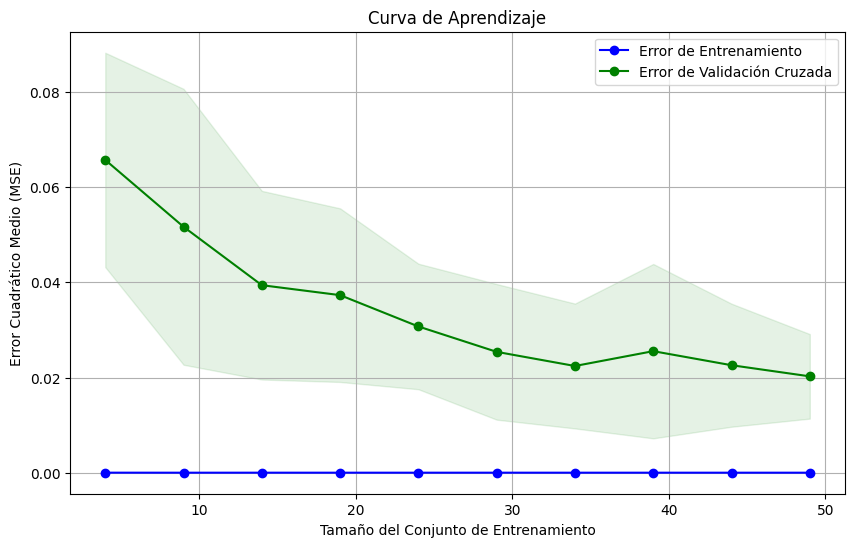

In [206]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model_random, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Promedio y desviación estándar de los errores de entrenamiento y validación
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Error de Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Error de Validación Cruzada')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.legend(loc='best')
plt.grid()
plt.show()

**Notas**
De la grafica anterior podemos observar lo siguiente

**Error de Entrenamiento:** El error de entrenamiento (en azul) es consistentemente bajo y cercano a cero. Esto indica que el modelo está ajustando muy bien los datos de entrenamiento, lo cual es esperable con un modelo complejo como XGBoost.

**Error de Validación Cruzada:** El error de validación cruzada (en verde) disminuye a medida que aumenta el tamaño del conjunto de entrenamiento, lo que sugiere que el modelo se está beneficiando de más datos y está mejorando su capacidad de generalización. Sin embargo, la presencia de una brecha entre el error de entrenamiento y el error de validación cruzada puede indicar que aún hay un cierto grado de sobreajuste (overfitting).

## **7. Conclusiones**
---

## **7.1. Conclusiones sobre la Gestion del Agua en Bogotá**

1. Bogotá enfrenta desafíos significativos en la gestión del agua debido a la creciente incidencia de fenómenos climáticos extremos, como sequías e inundaciones, relacionados con los eventos de El Niño y La Niña.

2. La ciudad depende en gran medida del sistema de páramos para su suministro de agua, lo que la hace especialmente susceptible a los impactos del cambio climático en estos ecosistemas. La conservación y protección de los páramos son fundamentales para garantizar un suministro de agua seguro y sostenible para la ciudad.

3. Es crucial que las autoridades locales implementen medidas efectivas de planificación y gestión del agua. Esto incluye el desarrollo de infraestructuras resilientes, la diversificación de fuentes de agua y la promoción de prácticas de conservación del agua entre la población.

4. La gestión del agua en Bogotá requiere un enfoque integrado y colaborativo que involucre a diferentes actores, incluyendo al gobierno local, la sociedad civil, el sector privado y la comunidad científica.

## **7.2. Conclusiones sobre el Desempeño del Modelo XGBoost para la Gestión del Agua en Bogotá**

1. Nuestro análisis ha demostrado que el modelo XGBoost es altamente efectivo en la predicción de variables relacionadas con la gestión del agua en Bogotá. Las métricas de desempeño, incluyendo el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), muestran que el modelo es capaz de hacer predicciones precisas y explicar una parte significativa de la variabilidad en los datos.


2. Es importante destacar que el modelo muestra un buen ajuste a los datos de entrenamiento y mejora su capacidad de generalización con más datos. Sin embargo, observamos una brecha entre el error de entrenamiento y el error de validación cruzada, lo que sugiere la posibilidad de sobreajuste. Por lo tanto, recomendamos considerar medidas adicionales, como la selección de un modelo menos complejo o la aplicación de técnicas de regularización, para mejorar la capacidad del modelo para generalizar a nuevos datos.

3. Es importante destacar que las métricas de desempeño de los modelos, como el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE), pueden mejorar sustancialmente con un mayor volumen de datos. Si bien los datos disponibles para nuestro proyecto representan una valiosa fuente de información, es importante reconocer que no constituyen un gran volumen en comparación con la complejidad de los fenómenos relacionados con la gestión del agua en Bogotá.

3. La limitación en la cantidad de datos puede tener un impacto en la capacidad del modelo para generalizar y capturar la complejidad de los patrones y tendencias relacionados con el suministro y la demanda de agua. Por lo tanto, es posible que las métricas de desempeño del modelo puedan mejorar aún más con una mayor cantidad de datos disponibles para su entrenamiento y evaluación.

4. A pesar de los logros del modelo, se reconoce la importancia de abordar los desafíos potenciales de sobreajuste y mejorar aún más su capacidad predictiva. Es crucial asegurarse de que el modelo no esté ajustado demasiado a los datos disponibles y trabajar en su mejora continua para hacer predicciones más precisas en el futuro.



## **7.3 Conclusiones Finales**

1. El proyecto de desarrollo y evaluación del modelo XGBoost para la gestión del agua en Bogotá representa un gran paso hacia la mejora de la seguridad hídrica y la sostenibilidad ambiental en la ciudad. A lo largo de este proyecto, se han logrado avances significativos en la predicción y comprensión de los patrones y tendencias relacionados con el suministro y la demanda de agua, así como en la identificación de posibles estrategias y acciones para abordar los desafíos existentes.

2. Al emplear técnicas avanzadas de modelado y análisis de datos, se ha desarrollado un modelo predictivo robusto y preciso que puede ayudar a las autoridades locales y otros actores relevantes a tomar decisiones informadas en materia de gestión del agua. Además, se ha resaltado la importancia de considerar aspectos clave, como la adaptación al cambio climático, la eficiencia en el uso del agua, la innovación tecnológica y la participación ciudadana, en el diseño e implementación de políticas y programas relacionados con el agua.

